# Load Data

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import scipy as sp                                          # Apply advanced mathematical functions.
from scipy import stats
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce                              # Encode data.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')


#Load and preview the data
data_analysis = pd.read_pickle('Data_cleaned.pickle')
data_analysis.head(n = 5)

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_CODE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
510,45A9F833-50F9-F1C33CEC-3860,F1C33CEC-3860-USERID001,04778C0E-ED53-DOC001,1,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2023-10-29 09:47:00,Passing Parameter,0,,1,118.0.0.0,Chrome
511,10D432FC-0748-73C71F14-2325,73C71F14-2325-USERID001,04778C0E-ED53-DOC001,1,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2023-10-29 09:54:00,Passing Parameter,0,,1,116.0.0.0,Chrome
512,29A71608-73CB-90A7F97B-4F8E,90A7F97B-4F8E-USERID003,FD48D86D-35AE-DOC003,3,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2023-10-29 22:19:00,Passing Parameter,0,,1,118.0.0.0,Chrome
513,002839EE-C103-AF2E40FC-47BE,AF2E40FC-47BE-USERID003,FD48D86D-35AE-DOC003,3,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2023-10-30 00:11:00,Passing Parameter,0,,1,118.0.0.0,Chrome
514,983EBB83-D6E1-164E1194-547F,164E1194-547F-USERID001,832651B9-5163-DOC001,1,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2023-10-30 08:11:00,Passing Parameter,0,,1,118.0.0.0,Chrome


# Study Data

In [2]:
#Check the shape of the data
data_analysis.shape

(678, 15)

In [3]:
#Check the number of unique users
len(np.unique(data_analysis.USER_ID))

442

In [4]:
#Check the number of unique UNIQUE_ID
len(np.unique(data_analysis.UNIQUE_ID))

678

In [5]:
#Check the number of unique DOCUMENT_ID
len(np.unique(data_analysis.DOCUMENT_ID))

478

In [6]:
#Check the data types
data_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 510 to 1392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UNIQUE_ID             678 non-null    object        
 1   USER_ID               678 non-null    object        
 2   DOCUMENT_ID           678 non-null    object        
 3   PAGE_NO               678 non-null    int64         
 4   GETEDITOR_VERSION     678 non-null    string        
 5   TOTAL_ANNOTATION      678 non-null    int64         
 6   BROWSER_NAME_VERSION  678 non-null    string        
 7   DEVICE_NAME           678 non-null    string        
 8   CREATED_DATE          678 non-null    datetime64[ns]
 9   PROCESS_STAGE         678 non-null    string        
 10  ERROR_CODE            678 non-null    int64         
 11  ERROR_DETAIL          678 non-null    string        
 12  ISSUE_ISBLANKPNG      678 non-null    int64         
 13  BROWSER_VERSION       

In [7]:
filtered_dtypes = data_analysis.dtypes[~data_analysis.dtypes.isin(['object', 'string'])]
data_analysis.columns.to_series().loc[filtered_dtypes.index].groupby(filtered_dtypes.astype(str)).groups

{'datetime64[ns]': ['CREATED_DATE'], 'int64': ['PAGE_NO', 'TOTAL_ANNOTATION', 'ERROR_CODE', 'ISSUE_ISBLANKPNG'], 'object': ['UNIQUE_ID', 'USER_ID', 'DOCUMENT_ID']}

# Analysis Data

In [8]:
#Check for correlations
data_analysis.corr(numeric_only = True).abs()

,PAGE_NO,TOTAL_ANNOTATION,ERROR_CODE,ISSUE_ISBLANKPNG
PAGE_NO,1.000000,0.065659,NaN,NaN
TOTAL_ANNOTATION,0.065659,1.000000,NaN,NaN
ERROR_CODE,NaN,NaN,NaN,NaN
ISSUE_ISBLANKPNG,NaN,NaN,NaN,NaN


In [9]:
#Generate summary statistics for all of the data
filtered_dtypes = data_analysis.dtypes[~data_analysis.dtypes.isin(['object', 'string'])]
data_analysis[filtered_dtypes.index].describe()

,PAGE_NO,TOTAL_ANNOTATION,CREATED_DATE,ERROR_CODE,ISSUE_ISBLANKPNG
count,678.000000,678.000000,678,678.0,678.0
mean,2.135693,2.544248,2024-04-11 08:22:35.929203456,0.0,1.0
min,1.000000,1.000000,2023-10-29 09:47:00,0.0,1.0
25%,1.000000,1.000000,2023-11-16 07:49:45,0.0,1.0
50%,1.000000,1.000000,2023-12-08 09:59:30,0.0,1.0
75%,2.000000,3.000000,2024-11-26 17:00:45,0.0,1.0
max,38.000000,28.000000,2025-03-26 15:05:00,0.0,1.0
std,3.196082,3.203159,NaN,0.0,0.0


In [10]:
#Generate summary statistics for numerical data only
data_analysis.describe(include = np.number)

,PAGE_NO,TOTAL_ANNOTATION,ERROR_CODE,ISSUE_ISBLANKPNG
count,678.000000,678.000000,678.0,678.0
mean,2.135693,2.544248,0.0,1.0
std,3.196082,3.203159,0.0,0.0
min,1.000000,1.000000,0.0,1.0
25%,1.000000,1.000000,0.0,1.0
50%,1.000000,1.000000,0.0,1.0
75%,2.000000,3.000000,0.0,1.0
max,38.000000,28.000000,0.0,1.0


In [11]:
#Generate modal values for all data
# Drop UNIQUE_ID since it's unique.

data_analysis.drop(['UNIQUE_ID'], axis = 1).mode()

,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_CODE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
0,582170D6-592F-USERID001,FC19F66C-BCFA-DOC001,1,,1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Desktop,2025-03-12 11:37:00,Passing Parameter,0,,1,119.0.0.0,Chrome


In [12]:
#Generate skewness and kurtosis measurements
data_analysis.skew(numeric_only = True)
data_analysis.kurt(numeric_only = True)

PAGE_NO             62.563687
TOTAL_ANNOTATION    19.420210
ERROR_CODE           0.000000
ISSUE_ISBLANKPNG     0.000000
dtype: float64

array([[<Axes: title={'center': 'PAGE_NO'}>,
        <Axes: title={'center': 'TOTAL_ANNOTATION'}>],
       [<Axes: title={'center': 'ERROR_CODE'}>,
        <Axes: title={'center': 'ISSUE_ISBLANKPNG'}>]], dtype=object)

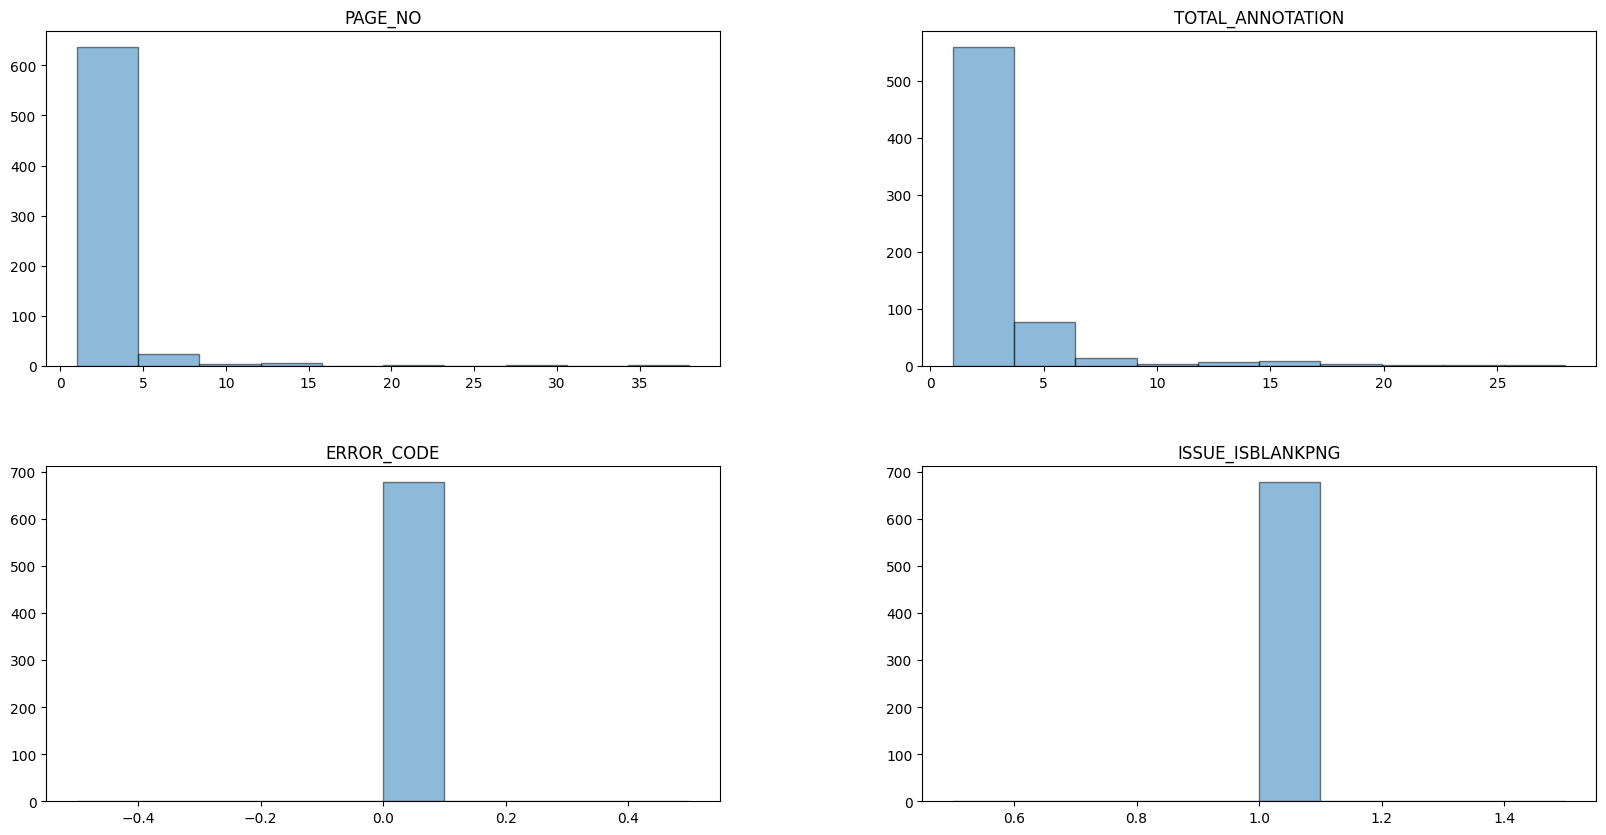

In [13]:
#Plot histograms for all numerical columns
data_analysis_for_hist = \
data_analysis.select_dtypes(exclude = ['bool', 'datetime64[ns]'])

data_analysis_for_hist.hist(figsize = (20, 10), alpha = 0.5,
                         edgecolor = 'black', grid = False)


In [14]:
#Generate a box plot for Page_no
data_analysis['PAGE_NO'].describe()

count    678.000000
mean       2.135693
std        3.196082
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       38.000000
Name: PAGE_NO, dtype: float64

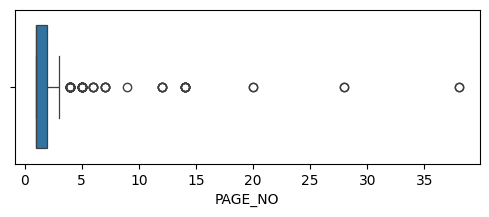

In [15]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = data_analysis['PAGE_NO'], linewidth = 0.9);

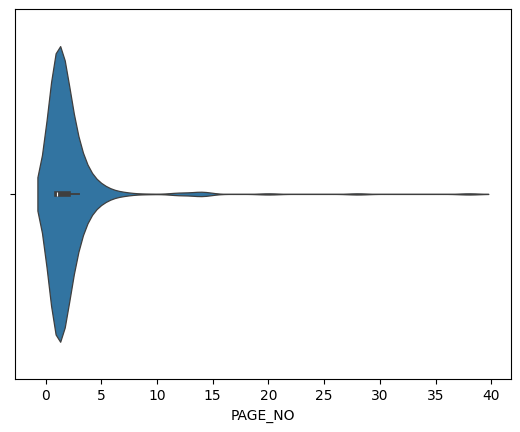

In [16]:
#Generate a violin plot for PAGE_NO
sns.violinplot(x = data_analysis['PAGE_NO'], linewidth = 0.9);

In [17]:
#Generate a box plot for TOTAL_ANNOTATION
data_analysis['TOTAL_ANNOTATION'].describe()


count    678.000000
mean       2.544248
std        3.203159
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       28.000000
Name: TOTAL_ANNOTATION, dtype: float64

<Axes: xlabel='TOTAL_ANNOTATION'>

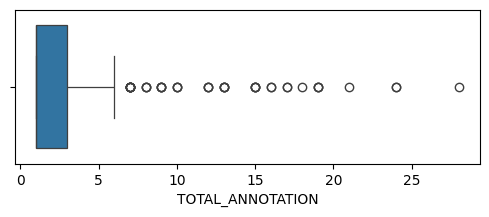

In [18]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = data_analysis['TOTAL_ANNOTATION'],
            linewidth = 0.9)

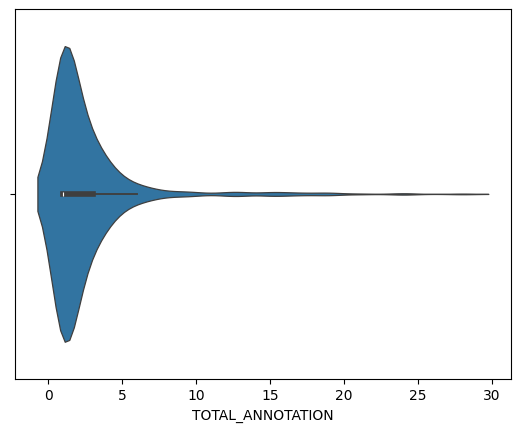

In [19]:
#Generate a violin plot for TOTAL_ANNOTATION
sns.violinplot(x = data_analysis['TOTAL_ANNOTATION'],
               linewidth=0.9);

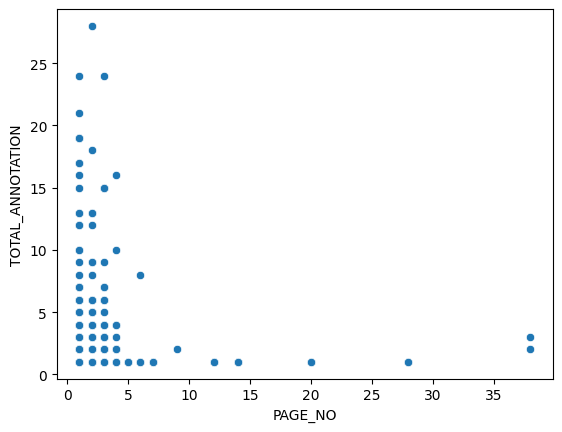

In [20]:
#Generate scatter plots comparing PAGE_NO to TOTAL_ANNOTATION
sns.scatterplot(data = data_analysis, x = 'PAGE_NO',
                y = 'TOTAL_ANNOTATION');

In [21]:
#Generate bar charts for DEVICE_NAME
DEVICE_NAME_dist = \
data_analysis['DEVICE_NAME'].value_counts(dropna = False)

DEVICE_NAME_dist

DEVICE_NAME
Desktop    624
Mobile      54
Name: count, dtype: Int64

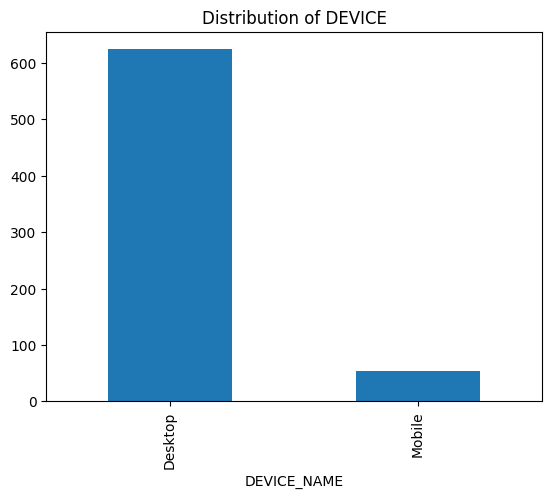

In [22]:
# Vertical bar chart.

DEVICE_NAME_dist.plot(kind = 'bar')
plt.title('Distribution of DEVICE');

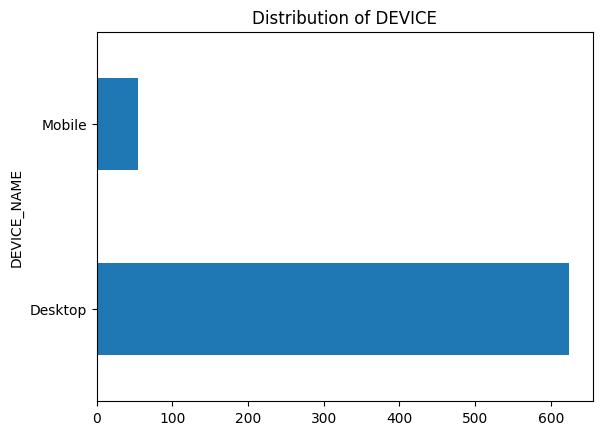

In [23]:
# Horizontal bar chart

DEVICE_NAME_dist.plot(kind = 'barh')
plt.title('Distribution of DEVICE');

In [24]:
#Generate a bar chart for BROWSER_VERSION
BROWSER_VERSION_dist = \
data_analysis['BROWSER_VERSION'].value_counts(dropna = False)

BROWSER_VERSION_dist

BROWSER_VERSION
119.0.0.0    218
118.0.0.0     64
133.0.0.0     47
119           39
134.0.0.0     37
Unknown       34
120.0.0.0     33
131.0.0.0     25
109.0.0.0     24
120           22
123.0.0.0     15
122.0.0.0     15
132.0.0.0     13
126.0.0.0     12
135           11
115            9
121            8
129.0.0.0      7
127.0.0.0      6
130.0.0.0      6
118            5
134            3
125.0.0.0      3
121.0.0.0      3
136            3
133            3
124.0.0.0      2
116.0.0.0      1
111.0.0.0      1
               1
131            1
116            1
114.0.0.0      1
123            1
122            1
124            1
132            1
126            1
Name: count, dtype: Int64

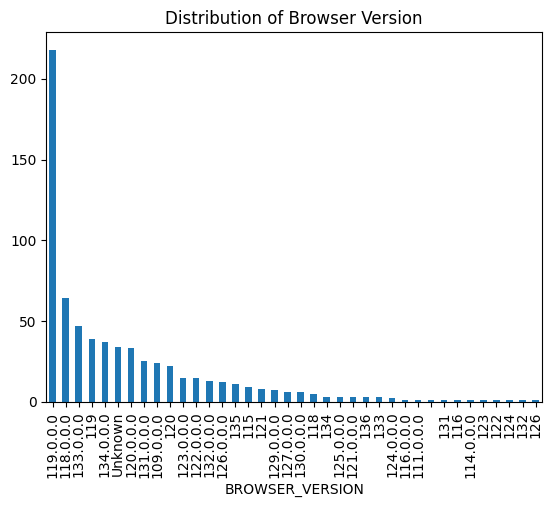

In [25]:
# Vertical bar chart.
BROWSER_VERSION_dist.plot(kind = 'bar')
plt.title('Distribution of Browser Version');

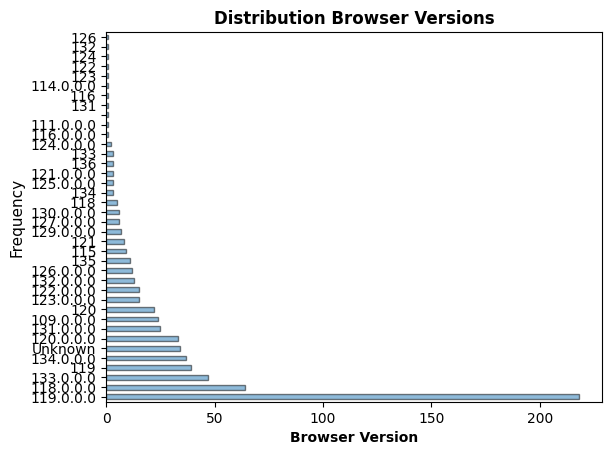

In [26]:
BROWSER_VERSION_dist.plot(kind = 'barh',
                       alpha = 0.5, edgecolor = 'black')
plt.title('Distribution Browser Versions',
          size = 12, weight = 'bold')

plt.xlabel('Browser Version', size = 10, weight = 'bold')
plt.ylabel('Frequency', size = 11)
plt.show()

In [27]:
#Generate a bar chart for BROWSER_NAME
BROWSER_NAME_dist = \
data_analysis['BROWSER_NAME'].value_counts(dropna = False)

BROWSER_NAME_dist

BROWSER_NAME
Chrome     500
Firefox    109
Safari      34
Edge        30
Unknown      5
Name: count, dtype: Int64

Text(0.5, 1.0, 'Distribution of BROWSER NAME')

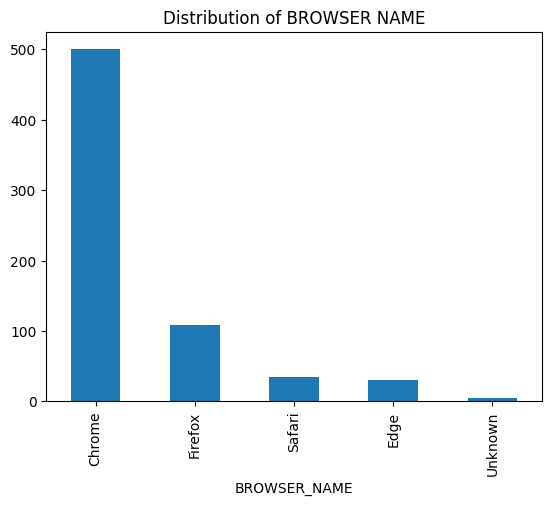

In [28]:
# Vertical bar chart.
BROWSER_NAME_dist.plot(kind = 'bar')
plt.title('Distribution of BROWSER NAME')

In [29]:
PROCESS_STAGE_dist = \
data_analysis['PROCESS_STAGE'].value_counts(dropna = False)

PROCESS_STAGE_dist

PROCESS_STAGE
Passing Parameter                                                                                                                                                                                                                                                                                               466
Doc Editor : Passing Parameter                                                                                                                                                                                                                                                                                  108
Doc Editor : Connection Issues during Save Processs - System.Web.Services.Protocols.SoapException: Server was unable to process request. ---> System.Data.Entity.Core.EntityException: The underlying provider failed on Open. ---> System.Data.SqlClient.SqlException: Connection Timeout Expired.  The tim     25
Doc Editor : Connection Issues during Save Processs - The unde

In [30]:
ERROR_CODE_dist = \
data_analysis['ERROR_CODE'].value_counts(dropna = False)

ERROR_CODE_dist

ERROR_CODE
0    678
Name: count, dtype: int64

In [31]:
ERROR_DETAIL_dist = \
data_analysis['ERROR_DETAIL'].value_counts(dropna = False)

ERROR_DETAIL_dist

ERROR_DETAIL
    678
Name: count, dtype: Int64

In [32]:
#Identify missing values 
data_analysis.isnull().sum()


#Identify the percentage of missing values for each feature
percent_missing = data_analysis.isnull().mean() 

percent_missing

UNIQUE_ID               0.0
USER_ID                 0.0
DOCUMENT_ID             0.0
PAGE_NO                 0.0
GETEDITOR_VERSION       0.0
TOTAL_ANNOTATION        0.0
BROWSER_NAME_VERSION    0.0
DEVICE_NAME             0.0
CREATED_DATE            0.0
PROCESS_STAGE           0.0
ERROR_CODE              0.0
ERROR_DETAIL            0.0
ISSUE_ISBLANKPNG        0.0
BROWSER_VERSION         0.0
BROWSER_NAME            0.0
dtype: float64

In [33]:
#check epmty value  in dataset
empty_percent = data_analysis.apply(lambda x: x.astype(str).str.strip().eq('').mean()) * 100
print(empty_percent) # check empty percentage in dataset


UNIQUE_ID                 0.000000
USER_ID                   0.000000
DOCUMENT_ID               0.000000
PAGE_NO                   0.000000
GETEDITOR_VERSION       100.000000
TOTAL_ANNOTATION          0.000000
BROWSER_NAME_VERSION      0.294985
DEVICE_NAME               0.000000
CREATED_DATE              0.000000
PROCESS_STAGE             0.000000
ERROR_CODE                0.000000
ERROR_DETAIL            100.000000
ISSUE_ISBLANKPNG          0.000000
BROWSER_VERSION           0.147493
BROWSER_NAME              0.000000
dtype: float64


In [34]:
#check 0 value  in dataset
empty_percent = data_analysis.apply(lambda x: x.astype(str).str.strip().eq('0').mean()) * 100
print(empty_percent) # check empty percentage in dataset

UNIQUE_ID                 0.0
USER_ID                   0.0
DOCUMENT_ID               0.0
PAGE_NO                   0.0
GETEDITOR_VERSION         0.0
TOTAL_ANNOTATION          0.0
BROWSER_NAME_VERSION      0.0
DEVICE_NAME               0.0
CREATED_DATE              0.0
PROCESS_STAGE             0.0
ERROR_CODE              100.0
ERROR_DETAIL              0.0
ISSUE_ISBLANKPNG          0.0
BROWSER_VERSION           0.0
BROWSER_NAME              0.0
dtype: float64


In [35]:
#check Unknown value  in dataset
empty_percent = data_analysis.apply(lambda x: x.astype(str).str.strip().eq('Unknown').mean()) * 100
print(empty_percent) # check empty percentage in dataset

UNIQUE_ID               0.000000
USER_ID                 0.000000
DOCUMENT_ID             0.000000
PAGE_NO                 0.000000
GETEDITOR_VERSION       0.000000
TOTAL_ANNOTATION        0.000000
BROWSER_NAME_VERSION    0.000000
DEVICE_NAME             0.000000
CREATED_DATE            0.000000
PROCESS_STAGE           0.000000
ERROR_CODE              0.000000
ERROR_DETAIL            0.000000
ISSUE_ISBLANKPNG        0.000000
BROWSER_VERSION         5.014749
BROWSER_NAME            0.737463
dtype: float64


In [36]:
#Generate a missing-value -NULL report
def missing_value_NULL_pct_df(data):
    """Create a data frame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df
	


#Generate a missing-value -EMPTY report
def missing_value_EMPTY_pct_df(data):
    """Create a data frame to summarize missing values."""
  
    percent_missing = (data.astype(str).applymap(lambda x: x.strip() == '')).mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df


#Generate a value  = Unknown report
def missing_value_Unknown_pct_df(data):
    """Create a data frame to summarize missing values."""
  
    percent_missing = (data.astype(str).applymap(lambda x: x.strip() == 'Unknown')).mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df

#Generate a value  = 0 report
def missing_value_0_pct_df(data):
    """Create a data frame to summarize missing values."""
  
    percent_missing = (data.astype(str).applymap(lambda x: x.strip() == '0')).mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df



missing_value_df = missing_value_NULL_pct_df(data_analysis)

missing_value_df

,column_name,percent_missing
0,UNIQUE_ID,0.0
1,USER_ID,0.0
2,DOCUMENT_ID,0.0
3,PAGE_NO,0.0
4,GETEDITOR_VERSION,0.0
5,TOTAL_ANNOTATION,0.0
6,BROWSER_NAME_VERSION,0.0
7,DEVICE_NAME,0.0
8,CREATED_DATE,0.0
9,PROCESS_STAGE,0.0


In [37]:
missing_value_EMPTY_df = missing_value_EMPTY_pct_df(data_analysis)

missing_value_EMPTY_df

,column_name,percent_missing
4,GETEDITOR_VERSION,100.00
11,ERROR_DETAIL,100.00
6,BROWSER_NAME_VERSION,0.29
13,BROWSER_VERSION,0.15
1,USER_ID,0.00
2,DOCUMENT_ID,0.00
0,UNIQUE_ID,0.00
5,TOTAL_ANNOTATION,0.00
3,PAGE_NO,0.00
7,DEVICE_NAME,0.00


In [38]:
missing_value_0_df = missing_value_0_pct_df(data_analysis)

missing_value_0_df

,column_name,percent_missing
10,ERROR_CODE,100.0
1,USER_ID,0.0
0,UNIQUE_ID,0.0
3,PAGE_NO,0.0
4,GETEDITOR_VERSION,0.0
5,TOTAL_ANNOTATION,0.0
2,DOCUMENT_ID,0.0
6,BROWSER_NAME_VERSION,0.0
7,DEVICE_NAME,0.0
8,CREATED_DATE,0.0


In [39]:
missing_value_EMPTY_df = missing_value_Unknown_pct_df(data_analysis)

missing_value_EMPTY_df

,column_name,percent_missing
13,BROWSER_VERSION,5.01
14,BROWSER_NAME,0.74
0,UNIQUE_ID,0.00
3,PAGE_NO,0.00
4,GETEDITOR_VERSION,0.00
1,USER_ID,0.00
2,DOCUMENT_ID,0.00
6,BROWSER_NAME_VERSION,0.00
5,TOTAL_ANNOTATION,0.00
7,DEVICE_NAME,0.00


In [40]:
#Remove features with a high percentage of missing values/Empty values/0 values/Unknown values
# Threshold above which to drop feature.

threshold = 80

cols_to_drop = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > threshold]['column_name'])

print('Features with NULL values')
print('Number of features to drop:',
      missing_value_df[ \
      missing_value_df['percent_missing'] > threshold].shape[0])

print(f'Features with missing values greater than {threshold}%:',
      cols_to_drop)

#empty values
cols_to_drop1 = \
list(missing_value_EMPTY_df[missing_value_EMPTY_df['percent_missing'] \
                      > threshold]['column_name'])

print('\nFeatures with Empty values')
print('Number of features to drop:',
      missing_value_EMPTY_df[ \
      missing_value_EMPTY_df['percent_missing'] > threshold].shape[0])

print(f'Features with Empty values greater than {threshold}%:',
      cols_to_drop1)

# 0 values
cols_to_drop2 = \
list(missing_value_0_df[missing_value_0_df['percent_missing'] \
                      > threshold]['column_name'])

print('\nFeatures with 0 values')
print('Number of features to drop:',
      missing_value_0_df[ \
      missing_value_0_df['percent_missing'] > threshold].shape[0])

print(f'Features with 0 values greater than {threshold}%:',
      cols_to_drop2)

# Unknown values
cols_to_drop3 = \
list(missing_value_EMPTY_df[missing_value_EMPTY_df['percent_missing'] \
                      > threshold]['column_name'])

print('\nFeatures with 0 values')
print('Number of features to drop:',
      missing_value_EMPTY_df[ \
      missing_value_EMPTY_df['percent_missing'] > threshold].shape[0])

print(f'Features with 0 values greater than {threshold}%:',
      cols_to_drop3)
	  
	  


Features with NULL values
Number of features to drop: 0
Features with missing values greater than 80%: []

Features with Empty values
Number of features to drop: 0
Features with Empty values greater than 80%: []

Features with 0 values
Number of features to drop: 1
Features with 0 values greater than 80%: ['ERROR_CODE']

Features with 0 values
Number of features to drop: 0
Features with 0 values greater than 80%: []


# Processing Data

In [41]:
#Remove features with a high percentage of missing values/Empty values/0 values/Unknown values
# Combine the lists of columns to drop.
cols_to_drop = list(set(cols_to_drop) | set(cols_to_drop1) | set(cols_to_drop2) | set(cols_to_drop3))
data_analysis_cleaned = data_analysis.drop(cols_to_drop, axis = 1)

data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 510 to 1392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UNIQUE_ID             678 non-null    object        
 1   USER_ID               678 non-null    object        
 2   DOCUMENT_ID           678 non-null    object        
 3   PAGE_NO               678 non-null    int64         
 4   GETEDITOR_VERSION     678 non-null    string        
 5   TOTAL_ANNOTATION      678 non-null    int64         
 6   BROWSER_NAME_VERSION  678 non-null    string        
 7   DEVICE_NAME           678 non-null    string        
 8   CREATED_DATE          678 non-null    datetime64[ns]
 9   PROCESS_STAGE         678 non-null    string        
 10  ERROR_DETAIL          678 non-null    string        
 11  ISSUE_ISBLANKPNG      678 non-null    int64         
 12  BROWSER_VERSION       678 non-null    string        
 13  BROWSER_NAME          

In [42]:
# Check miising value/e,mpty value/0 value/Unknown value in cleaned data
# For NULL values.
missing_value_df = missing_value_NULL_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('Number of features with missing values:',
      len(missing_columns))


# For Empty values.
missing_value_df = missing_value_EMPTY_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('\nNumber of features with Empty values:',
      len(missing_columns))


# For 0 values.
missing_value_df = missing_value_0_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('\nNumber of features with 0 values:',
      len(missing_columns))

# For Unknown values.
missing_value_df = missing_value_Unknown_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('\nNumber of features with Unknown values:',
      len(missing_columns))

[]
Number of features with missing values: 0
['GETEDITOR_VERSION', 'ERROR_DETAIL', 'BROWSER_NAME_VERSION', 'BROWSER_VERSION']

Number of features with Empty values: 4
[]

Number of features with 0 values: 0
['BROWSER_VERSION', 'BROWSER_NAME']

Number of features with Unknown values: 2


In [43]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown'])]

data_analysis_filter_missing1


,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Unknown
956,7637F07A-36AA-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:12:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
957,453BF0AF-F3ED-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:10:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
958,A87663BA-E01F-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:11:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
959,6D2A61EB-E8BC-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:08:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
961,02978EFE-B4EB-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:09:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
992,2D65DFF0-7558-1FE8BD49-5128,1FE8BD49-5128-USERID001,E8B3D091-D50C-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 20:55:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
1054,632D4202-BE42-54BE44F3-7029,54BE44F3-7029-USERID001,88BB32F2-4C5E-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 16:56:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
1055,0B8C984C-10F5-54BE44F3-7029,54BE44F3-7029-USERID001,88BB32F2-4C5E-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 16:58:00,Doc Editor : Passing Parameter,,1,Unknown,Safari
1056,AA082DB0-A9E5-54BE44F3-7029,54BE44F3-7029-USERID001,C874E32C-5CF1-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 17:09:00,Doc Editor : Passing Parameter,,1,Unknown,Safari


In [44]:
#check value empty and filter BROWSER_NAME
data_analysis_filter_missing2 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_NAME'].isin(['', '0', 'Unknown'])]

data_analysis_filter_missing2

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
626,87367D9E-79EC-B6C83537-2386,B6C83537-2386-USERID002,EBDDD29E-605F-DOC002,2,,12,None,Desktop,2023-11-09 13:06:00,Passing Parameter,,1,119,Unknown
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Unknown
1156,9F822752-853F-6F39CDF9-1665,6F39CDF9-1665-USERID002,C391BCF7-D05C-DOC002,2,,13,,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,,1,133.0.0.0,Unknown
1236,E48C5CAE-28FB-AA591A77-6DF3,AA591A77-6DF3-USERID001,D82209DC-1C45-DOC001,1,,1,None,Mobile,2024-08-09 16:37:00,Doc Editor : Passing Parameter,,1,126.0.0.0,Unknown
1350,B085BEF8-C8F9-15F421D9-ED58,15F421D9-ED58-USERID001,121548DF-0F81-DOC001,1,,2,None,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,,1,133.0.0.0,Unknown


In [45]:
#formating the Browser name from 119 to 119.0.0.0

def standardize_version(v):
    if pd.isna(v) or str(v).strip() == '':
        return v  # let epmty or None
    parts = str(v).split('.')
    while len(parts) < 4:
        parts.append('0')
    return '.'.join(parts)

data_analysis_cleaned['BROWSER_VERSION'] = data_analysis_cleaned['BROWSER_VERSION'].apply(standardize_version)




In [46]:
# 1. get the data
known = data_analysis_cleaned[data_analysis_cleaned['BROWSER_NAME'] != 'Unknown']

# 2. mapping the data
mapping = known.groupby(['DEVICE_NAME', 'BROWSER_VERSION'])['BROWSER_NAME'].first().to_dict()

mapping

{('Desktop', '109.0.0.0'): 'Chrome',
 ('Desktop', '111.0.0.0'): 'Chrome',
 ('Desktop', '115.0.0.0'): 'Firefox',
 ('Desktop', '116.0.0.0'): 'Chrome',
 ('Desktop', '118.0.0.0'): 'Chrome',
 ('Desktop', '119.0.0.0'): 'Firefox',
 ('Desktop', '120.0.0.0'): 'Firefox',
 ('Desktop', '121.0.0.0'): 'Firefox',
 ('Desktop', '122.0.0.0'): 'Chrome',
 ('Desktop', '123.0.0.0'): 'Chrome',
 ('Desktop', '124.0.0.0'): 'Firefox',
 ('Desktop', '125.0.0.0'): 'Chrome',
 ('Desktop', '126.0.0.0'): 'Chrome',
 ('Desktop', '127.0.0.0'): 'Chrome',
 ('Desktop', '129.0.0.0'): 'Chrome',
 ('Desktop', '130.0.0.0'): 'Chrome',
 ('Desktop', '131.0.0.0'): 'Firefox',
 ('Desktop', '132.0.0.0'): 'Chrome',
 ('Desktop', '133.0.0.0'): 'Chrome',
 ('Desktop', '134.0.0.0'): 'Chrome',
 ('Desktop', '135.0.0.0'): 'Firefox',
 ('Desktop', '136.0.0.0'): 'Firefox',
 ('Desktop', 'Unknown.0.0.0'): 'Safari',
 ('Mobile', '114.0.0.0'): 'Chrome',
 ('Mobile', '118.0.0.0'): 'Chrome',
 ('Mobile', '119.0.0.0'): 'Chrome',
 ('Mobile', '120.0.0.0'): 'Ch

In [47]:
# 3. fill the data that matches the mapping
def fill_browser_name(row):
    if row['BROWSER_NAME'] == 'Unknown':
        return mapping.get((row['DEVICE_NAME'], row['BROWSER_VERSION']), 'Unknown')
    return row['BROWSER_NAME']

# 4. apply the mapping to the data
data_analysis_cleaned['BROWSER_NAME'] = data_analysis_cleaned.apply(fill_browser_name, axis=1)

In [48]:
#check value empty and filter BROWSER_NAME
data_analysis_filter_missing2 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_NAME'].isin(['', '0', 'Unknown'])]

data_analysis_filter_missing2

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Unknown


In [49]:
# imputated value with mode for browser version and browser name in 2023 year data and match with device name

# get year - 2023
df_2023 = data_analysis_cleaned[data_analysis_cleaned['CREATED_DATE'].dt.year == 2023]

# find DEVICE_NAME following BROWSER_VERSION and BROWSER_NAME
mode_version = df_2023[df_2023['BROWSER_VERSION'] != 'Unknown'].groupby('DEVICE_NAME')['BROWSER_VERSION'].agg(lambda x: x.mode().iloc[0])
mode_name = df_2023[df_2023['BROWSER_NAME'] != 'Unknown'].groupby('DEVICE_NAME')['BROWSER_NAME'].agg(lambda x: x.mode().iloc[0])


# function to fill value Unknown following DEVICE_NAME data
def impute_browser_version(row):
    if row['CREATED_DATE'].year == 2023 and row['BROWSER_VERSION'] == 'Unknown':
        return mode_version.get(row['DEVICE_NAME'], 'Unknown')
    return row['BROWSER_VERSION']

def impute_browser_name(row):
    if row['CREATED_DATE'].year == 2023 and row['BROWSER_NAME'] == 'Unknown':
        return mode_name.get(row['DEVICE_NAME'], 'Unknown')
    return row['BROWSER_NAME']



# imputated value with mode
data_analysis_cleaned['BROWSER_VERSION'] = data_analysis_cleaned.apply(impute_browser_version, axis=1)
data_analysis_cleaned['BROWSER_NAME'] = data_analysis_cleaned.apply(impute_browser_name, axis=1)


In [50]:
#check value empty and filter BROWSER_NAME
data_analysis_filter_missing2 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_NAME'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing2.shape[0]

0

In [51]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing1

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Chrome
956,7637F07A-36AA-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:12:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
957,453BF0AF-F3ED-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:10:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
958,A87663BA-E01F-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:11:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
959,6D2A61EB-E8BC-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:08:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
961,02978EFE-B4EB-08E3E7CC-3D09,08E3E7CC-3D09-USERID001,CEE121F2-05DE-DOC001,1,,2,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 17:09:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
992,2D65DFF0-7558-1FE8BD49-5128,1FE8BD49-5128-USERID001,E8B3D091-D50C-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-12-19 20:55:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
1054,632D4202-BE42-54BE44F3-7029,54BE44F3-7029-USERID001,88BB32F2-4C5E-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 16:56:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
1055,0B8C984C-10F5-54BE44F3-7029,54BE44F3-7029-USERID001,88BB32F2-4C5E-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 16:58:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari
1056,AA082DB0-A9E5-54BE44F3-7029,54BE44F3-7029-USERID001,C874E32C-5CF1-DOC001,1,,3,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,Mobile,2024-11-26 17:09:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari


In [52]:
# handle Unknown Browser version for Safari browser

import re

# Function get version of Safari
def get_safari_version(user_agent):
    match = re.search(r'Safari/([\d\.]+)', user_agent)
    if match:
        return match.group(1)
    else:
        return 'unknown'

# Imputate for Mobile + Unknown.0.0.0
def fill_safari_version(row):
    if row['DEVICE_NAME'] == 'Mobile' and row['BROWSER_VERSION'] == 'Unknown.0.0.0':
        safari_version = get_safari_version(row['BROWSER_NAME_VERSION'])
        return safari_version
    return row['BROWSER_VERSION']

# apply the function to fill the BROWSER_VERSION for Safari
data_analysis_cleaned['BROWSER_VERSION'] = data_analysis_cleaned.apply(fill_safari_version, axis=1)

In [53]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing1

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Chrome
1220,9E2D2E54-4282-A5598537-A9E7,A5598537-A9E7-USERID001,BABE821F-248E-DOC001,1,,2,Mozilla/5.0 (iPad; CPU OS 18_1_1 like Mac OS X...,Desktop,2025-02-20 11:53:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari


In [54]:
# compare the device whitr user-agent data

# function to extract data from user-agent
def extract_device(user_agent):
    match = re.search(r'\(([^;]+)', user_agent)
    if match:
        return match.group(1).strip()
    return 'Unknown'

# add new features device from user-agent
data_analysis_cleaned['EXTRACTED_DEVICE'] = data_analysis_cleaned['BROWSER_NAME_VERSION'].apply(extract_device)



EXTRACTED_DEVICE_dist = \
data_analysis_cleaned[['DEVICE_NAME', 'EXTRACTED_DEVICE']].value_counts(dropna = False)

EXTRACTED_DEVICE_dist


DEVICE_NAME  EXTRACTED_DEVICE
Desktop      Windows NT 10.0     600
Mobile       iPhone               33
             Linux                16
Desktop      Windows NT 6.1       10
Mobile       X11                   4
Desktop      Macintosh             4
             Unknown               4
             X11                   4
             Linux                 1
             iPad                  1
Mobile       Unknown               1
Name: count, dtype: int64

In [55]:
linux_data = data_analysis_cleaned[data_analysis_cleaned['EXTRACTED_DEVICE'].str.contains('Linux', case=False, na=False)]
linux_data

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
569,9025A1CD-260B-86B4FE1E-7146,86B4FE1E-7146-USERID002,FD9D78FC-0447-DOC002,2,,9,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2023-11-03 08:13:00,Passing Parameter,,1,118.0.0.0,Chrome,Linux
896,1A5A21C9-0ED3-05B13109-FA19,05B13109-FA19-USERID001,8A9353C0-E91E-DOC001,1,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2023-12-12 07:29:00,Passing Parameter,,1,120.0.0.0,Chrome,Linux
994,97194CAD-A2F2-205A7C46-EB34,205A7C46-EB34-USERID003,60ED21ED-BFBC-DOC003,3,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Desktop,2024-12-15 21:29:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1038,A02B9D73-C76D-4447A6CF-812F,4447A6CF-812F-USERID002,BE2DB3E2-9C04-DOC002,2,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-28 00:26:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1039,3285C369-00FE-4447A6CF-812F,4447A6CF-812F-USERID001,DA6B2F71-EC8E-DOC001,1,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-13 13:30:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1040,E5306E60-649E-4447A6CF-812F,4447A6CF-812F-USERID001,272F4AEB-50FD-DOC001,1,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-12 08:01:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1041,5E8AA850-6098-4447A6CF-812F,4447A6CF-812F-USERID001,A49C8EA5-B2D3-DOC001,1,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-13 14:26:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1042,0EC27EC7-A2F8-4447A6CF-812F,4447A6CF-812F-USERID002,AA8CE6D1-140F-DOC002,2,,4,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-06 07:57:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1043,723BF7F2-206D-4447A6CF-812F,4447A6CF-812F-USERID002,BE2DB3E2-9C04-DOC002,2,,3,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2024-12-28 00:30:00,Doc Editor : Passing Parameter,,1,131.0.0.0,Chrome,Linux
1095,6C477CAD-6E4F-582170D6-592F,582170D6-592F-USERID001,FC19F66C-BCFA-DOC001,1,,1,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,Mobile,2025-02-25 00:56:00,Doc Editor : Passing Parameter,,1,133.0.0.0,Chrome,Linux


In [56]:
linux_data_empty_device = data_analysis_cleaned[
    data_analysis_cleaned['BROWSER_NAME_VERSION'].str.contains('Linux', na=False) &  # contains 'Linux'
    (
        data_analysis_cleaned['DEVICE_NAME'].isna() |                      # NaN
        (data_analysis_cleaned['DEVICE_NAME'].astype(str).str.strip() == '')  # empty space or whitespace
    )
]

linux_data_empty_device

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE


In [57]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing1

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Chrome,Unknown
1220,9E2D2E54-4282-A5598537-A9E7,A5598537-A9E7-USERID001,BABE821F-248E-DOC001,1,,2,Mozilla/5.0 (iPad; CPU OS 18_1_1 like Mac OS X...,Desktop,2025-02-20 11:53:00,Doc Editor : Passing Parameter,,1,Unknown.0.0.0,Safari,iPad


In [58]:
# Function get version of Safari
def get_safari_version(user_agent):
    match = re.search(r'Safari/([\d\.]+)', user_agent)
    if match:
        return match.group(1)
    else:
        return 'unknown'

# Imputate for Desktop + Unknown.0.0.0
def fill_safari_version(row):
    if row['DEVICE_NAME'] == 'Desktop' and row['BROWSER_VERSION'] == 'Unknown.0.0.0':
        safari_version = get_safari_version(row['BROWSER_NAME_VERSION'])
        return safari_version
    return row['BROWSER_VERSION']

# apply the function to fill the BROWSER_VERSION for Safari
data_analysis_cleaned['BROWSER_VERSION'] = data_analysis_cleaned.apply(fill_safari_version, axis=1)

In [59]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing1

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,,Chrome,Unknown


In [60]:
# get year - 2023
df_2023 = data_analysis_cleaned[data_analysis_cleaned['CREATED_DATE'].dt.year == 2023]

# find DEVICE_NAME following BROWSER_VERSION and BROWSER_NAME
#mode_device = df_2023[df_2023['BROWSER_VERSION'] != ''].groupby('DEVICE_NAME')['BROWSER_VERSION'].agg(lambda x: x.mode().iloc[0])


mode_stats = df_2023[df_2023['BROWSER_VERSION'] != ''].groupby('DEVICE_NAME').agg({
    'BROWSER_VERSION': lambda x: x.mode().iloc[0],
    'BROWSER_NAME': lambda x: x.mode().iloc[0]
}).reset_index()

mode_stats


,DEVICE_NAME,BROWSER_VERSION,BROWSER_NAME
0,Desktop,119.0.0.0,Chrome
1,Mobile,114.0.0.0,Chrome


In [61]:
# function to fill value Unknown following DEVICE_NAME data
def impute_browser_version(row):
    if row['CREATED_DATE'].year == 2023 and row['BROWSER_VERSION'] == '':
        return mode_version.get(row['DEVICE_NAME'], '')
    return row['BROWSER_VERSION']

# imputated value with mode
data_analysis_cleaned['BROWSER_VERSION'] = data_analysis_cleaned.apply(impute_browser_version, axis=1)

In [62]:
#A7CCB425-4D80-57718CC6-5CC6
#check value empty and filter BROWSER_VERSION
data_analysis_cleaned[data_analysis_cleaned.UNIQUE_ID=='A7CCB425-4D80-57718CC6-5CC6']

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,119.0.0.0,Chrome,Unknown


In [63]:
#A7CCB425-4D80-57718CC6-5CC6
#check value empty after imputated and filter BROWSER_VERSION
data_analysis_cleaned[data_analysis_cleaned.UNIQUE_ID=='A7CCB425-4D80-57718CC6-5CC6']

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,,1,,Desktop,2023-12-09 09:15:00,Passing Parameter,,1,119.0.0.0,Chrome,Unknown


In [64]:
#check value empty and filter BROWSER_VERSION
data_analysis_filter_missing1 = data_analysis_cleaned[data_analysis_cleaned['BROWSER_VERSION'].isin(['', '0', 'Unknown','Unknown.0.0.0'])]

data_analysis_filter_missing1

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,GETEDITOR_VERSION,TOTAL_ANNOTATION,BROWSER_NAME_VERSION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ERROR_DETAIL,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE


In [65]:
# Check miising value/e,mpty value/0 value/Unknown value in cleaned data
# For NULL values.
missing_value_df = missing_value_NULL_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('Number of features with missing values:',
      len(missing_columns))




[]
Number of features with missing values: 0


In [66]:
# For Empty values.
missing_value_df = missing_value_EMPTY_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('Number of features with Empty values:',
      len(missing_columns))
print(missing_value_df)

['GETEDITOR_VERSION', 'ERROR_DETAIL', 'BROWSER_NAME_VERSION']
Number of features with Empty values: 3
             column_name  percent_missing
4      GETEDITOR_VERSION           100.00
10          ERROR_DETAIL           100.00
6   BROWSER_NAME_VERSION             0.29
2            DOCUMENT_ID             0.00
1                USER_ID             0.00
3                PAGE_NO             0.00
0              UNIQUE_ID             0.00
5       TOTAL_ANNOTATION             0.00
7            DEVICE_NAME             0.00
8           CREATED_DATE             0.00
9          PROCESS_STAGE             0.00
11      ISSUE_ISBLANKPNG             0.00
12       BROWSER_VERSION             0.00
13          BROWSER_NAME             0.00
14      EXTRACTED_DEVICE             0.00


In [67]:
#Drop the feature not using anymore and the features with high percentage above the threshold
cols_to_drop = ['GETEDITOR_VERSION', 'ERROR_DETAIL', 'BROWSER_NAME_VERSION']
data_analysis_cleaned = data_analysis_cleaned.drop(cols_to_drop, axis = 1)

In [68]:
# Verify Features For Empty values.
missing_value_df = missing_value_EMPTY_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('Number of features with Empty values:',
      len(missing_columns))
print(missing_value_df)

[]
Number of features with Empty values: 0
         column_name  percent_missing
0          UNIQUE_ID              0.0
1            USER_ID              0.0
2        DOCUMENT_ID              0.0
3            PAGE_NO              0.0
4   TOTAL_ANNOTATION              0.0
5        DEVICE_NAME              0.0
6       CREATED_DATE              0.0
7      PROCESS_STAGE              0.0
8   ISSUE_ISBLANKPNG              0.0
9    BROWSER_VERSION              0.0
10      BROWSER_NAME              0.0
11  EXTRACTED_DEVICE              0.0


In [69]:
# For 0 values.
missing_value_df = missing_value_0_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('Number of features with 0 values:',
      len(missing_columns))
print(missing_value_df)

[]
Number of features with 0 values: 0
         column_name  percent_missing
0          UNIQUE_ID              0.0
1            USER_ID              0.0
2        DOCUMENT_ID              0.0
3            PAGE_NO              0.0
4   TOTAL_ANNOTATION              0.0
5        DEVICE_NAME              0.0
6       CREATED_DATE              0.0
7      PROCESS_STAGE              0.0
8   ISSUE_ISBLANKPNG              0.0
9    BROWSER_VERSION              0.0
10      BROWSER_NAME              0.0
11  EXTRACTED_DEVICE              0.0


In [70]:
# For Unknown values.
missing_value_df = missing_value_Unknown_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('\nNumber of features with Unknown values:',
      len(missing_columns))
print(missing_value_df)

['EXTRACTED_DEVICE']

Number of features with Unknown values: 1
         column_name  percent_missing
11  EXTRACTED_DEVICE             0.74
0          UNIQUE_ID             0.00
2        DOCUMENT_ID             0.00
1            USER_ID             0.00
3            PAGE_NO             0.00
4   TOTAL_ANNOTATION             0.00
6       CREATED_DATE             0.00
5        DEVICE_NAME             0.00
7      PROCESS_STAGE             0.00
8   ISSUE_ISBLANKPNG             0.00
9    BROWSER_VERSION             0.00
10      BROWSER_NAME             0.00


In [71]:
data_EXTRACTED_DEVICE = data_analysis_cleaned[data_analysis_cleaned.EXTRACTED_DEVICE=='Unknown']
data_EXTRACTED_DEVICE

,UNIQUE_ID,USER_ID,DOCUMENT_ID,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME,EXTRACTED_DEVICE
626,87367D9E-79EC-B6C83537-2386,B6C83537-2386-USERID002,EBDDD29E-605F-DOC002,2,12,Desktop,2023-11-09 13:06:00,Passing Parameter,1,119.0.0.0,Firefox,Unknown
914,A7CCB425-4D80-57718CC6-5CC6,57718CC6-5CC6-USERID001,E00C9DC8-DFFD-DOC001,1,1,Desktop,2023-12-09 09:15:00,Passing Parameter,1,119.0.0.0,Chrome,Unknown
1156,9F822752-853F-6F39CDF9-1665,6F39CDF9-1665-USERID002,C391BCF7-D05C-DOC002,2,13,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,1,133.0.0.0,Chrome,Unknown
1236,E48C5CAE-28FB-AA591A77-6DF3,AA591A77-6DF3-USERID001,D82209DC-1C45-DOC001,1,1,Mobile,2024-08-09 16:37:00,Doc Editor : Passing Parameter,1,126.0.0.0,Chrome,Unknown
1350,B085BEF8-C8F9-15F421D9-ED58,15F421D9-ED58-USERID001,121548DF-0F81-DOC001,1,2,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,1,133.0.0.0,Chrome,Unknown


In [72]:
#Drop the feature not using anymore 
data_analysis_cleaned = data_analysis_cleaned.drop('EXTRACTED_DEVICE', axis = 1)
data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 510 to 1392
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   UNIQUE_ID         678 non-null    object        
 1   USER_ID           678 non-null    object        
 2   DOCUMENT_ID       678 non-null    object        
 3   PAGE_NO           678 non-null    int64         
 4   TOTAL_ANNOTATION  678 non-null    int64         
 5   DEVICE_NAME       678 non-null    string        
 6   CREATED_DATE      678 non-null    datetime64[ns]
 7   PROCESS_STAGE     678 non-null    string        
 8   ISSUE_ISBLANKPNG  678 non-null    int64         
 9   BROWSER_VERSION   678 non-null    object        
 10  BROWSER_NAME      678 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5), string(2)
memory usage: 63.6+ KB


In [73]:
# Check For Unknown values.
missing_value_df = missing_value_Unknown_pct_df(data_analysis_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])
print(missing_columns)
print('\nNumber of features with Unknown values:',
      len(missing_columns))
print(missing_value_df)

[]

Number of features with Unknown values: 0
         column_name  percent_missing
0          UNIQUE_ID              0.0
1            USER_ID              0.0
2        DOCUMENT_ID              0.0
3            PAGE_NO              0.0
4   TOTAL_ANNOTATION              0.0
5        DEVICE_NAME              0.0
6       CREATED_DATE              0.0
7      PROCESS_STAGE              0.0
8   ISSUE_ISBLANKPNG              0.0
9    BROWSER_VERSION              0.0
10      BROWSER_NAME              0.0


In [74]:
#remove the feature that not very important
cols_to_drop = ['UNIQUE_ID', 'USER_ID','DOCUMENT_ID']
data_analysis_cleaned = data_analysis_cleaned.drop(cols_to_drop, axis = 1)
data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 510 to 1392
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PAGE_NO           678 non-null    int64         
 1   TOTAL_ANNOTATION  678 non-null    int64         
 2   DEVICE_NAME       678 non-null    string        
 3   CREATED_DATE      678 non-null    datetime64[ns]
 4   PROCESS_STAGE     678 non-null    string        
 5   ISSUE_ISBLANKPNG  678 non-null    int64         
 6   BROWSER_VERSION   678 non-null    object        
 7   BROWSER_NAME      678 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(2), string(2)
memory usage: 47.7+ KB


In [75]:
#check duplicate data
duplicates = data_analysis_cleaned[data_analysis_cleaned.duplicated()]

duplicates

,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
1028,2,2,Desktop,2024-11-11 09:42:00,Doc Editor : Connection Issues during Save Pro...,1,130.0.0.0,Chrome
1156,2,13,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,1,133.0.0.0,Chrome
1213,1,2,Desktop,2025-03-25 12:06:00,Doc Editor : Connection Issues during Save Pro...,1,134.0.0.0,Chrome
1269,1,2,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,1,134.0.0.0,Chrome
1350,1,2,Desktop,2025-03-12 11:37:00,Doc Editor : Passing Parameter,1,133.0.0.0,Chrome
1391,1,2,Desktop,2025-01-24 12:08:00,Doc Editor : Connection Issues during Save Pro...,1,132.0.0.0,Chrome
1392,1,2,Desktop,2025-01-24 12:08:00,Doc Editor : Connection Issues during Save Pro...,1,132.0.0.0,Chrome


In [76]:
#remove duplicate data
data_analysis_cleaned = data_analysis_cleaned.drop_duplicates()

In [77]:
#reset index after drop duplicates
data_analysis_cleaned = data_analysis_cleaned.drop_duplicates().reset_index(drop=True)

data_analysis_cleaned.shape[0]

671

In [78]:
data_analysis_cleaned

,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,ISSUE_ISBLANKPNG,BROWSER_VERSION,BROWSER_NAME
0,1,1,Desktop,2023-10-29 09:47:00,Passing Parameter,1,118.0.0.0,Chrome
1,1,1,Desktop,2023-10-29 09:54:00,Passing Parameter,1,116.0.0.0,Chrome
2,3,1,Desktop,2023-10-29 22:19:00,Passing Parameter,1,118.0.0.0,Chrome
3,3,1,Desktop,2023-10-30 00:11:00,Passing Parameter,1,118.0.0.0,Chrome
4,1,1,Desktop,2023-10-30 08:11:00,Passing Parameter,1,118.0.0.0,Chrome
...,...,...,...,...,...,...,...,...
666,3,6,Desktop,2025-03-24 11:07:00,Doc Editor : Connection Issues during Save Pro...,1,126.0.0.0,Firefox
667,1,16,Desktop,2025-03-04 10:18:00,Doc Editor : Connection Issues during Save Pro...,1,133.0.0.0,Chrome
668,1,15,Desktop,2025-03-26 15:05:00,Doc Editor : Connection Issues during Save Pro...,1,134.0.0.0,Chrome
669,1,2,Desktop,2025-03-25 12:54:00,Doc Editor : Connection Issues during Save Pro...,1,134.0.0.0,Chrome


# ANALYSIS THE DATA

Text(0.5, 1.0, 'Original Distribution of PAGE_NO')

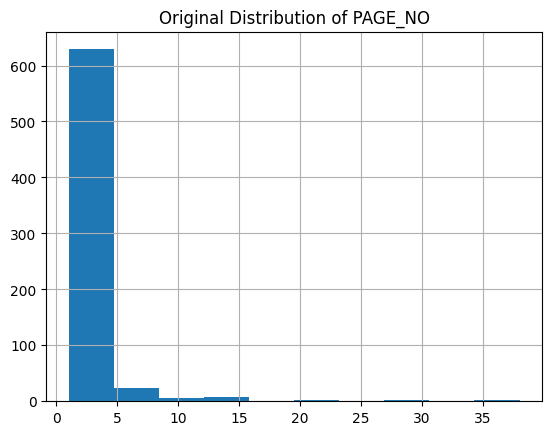

In [79]:
#View the distribution of PAGE_NO
data_analysis_cleaned['PAGE_NO'].hist()
plt.title('Original Distribution of PAGE_NO')

Text(0.5, 1.0, 'Original Distribution of TOTAL_ANNOTATION')

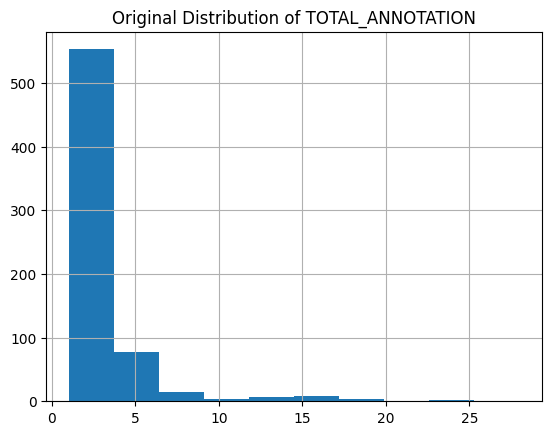

In [80]:
#View the distribution of PAGE_NO
data_analysis_cleaned['TOTAL_ANNOTATION'].hist()
plt.title('Original Distribution of TOTAL_ANNOTATION')

Text(0.5, 1.0, 'Original Distribution of DEVICE_NAME')

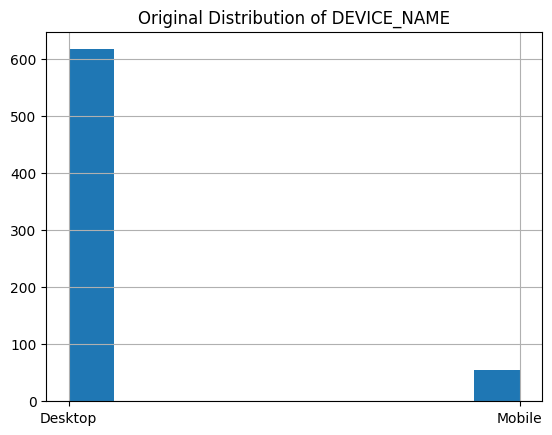

In [81]:
#View the distribution of DEVICE_NAME
data_analysis_cleaned['DEVICE_NAME'].hist()
plt.title('Original Distribution of DEVICE_NAME')

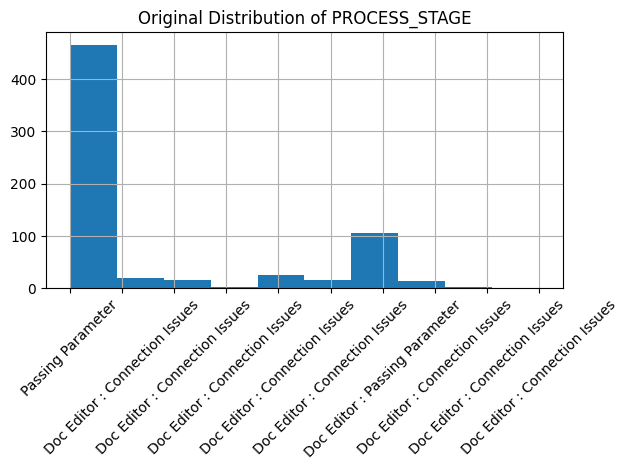

In [82]:
#View the distribution of PROCESS_STAGE
# Plot histogram
data_analysis_cleaned['PROCESS_STAGE'].hist()
plt.title('Original Distribution of PROCESS_STAGE')

# Rotate and shorten x-axis labels to 10 characters
plt.xticks(
    ticks=plt.xticks()[0],  # Keep current tick positions
    labels=[str(label)[:30] for label in data_analysis_cleaned['PROCESS_STAGE'].unique()],
    rotation=45
)

plt.tight_layout()
plt.show()

In [83]:
data_analysis_cleaned['PROCESS_STAGE'].value_counts(dropna = False)

PROCESS_STAGE
Passing Parameter                                                                                                                                                                                                                                                                                               466
Doc Editor : Passing Parameter                                                                                                                                                                                                                                                                                  105
Doc Editor : Connection Issues during Save Processs - System.Web.Services.Protocols.SoapException: Server was unable to process request. ---> System.Data.Entity.Core.EntityException: The underlying provider failed on Open. ---> System.Data.SqlClient.SqlException: Connection Timeout Expired.  The tim     25
Doc Editor : Connection Issues during Save Processs - The unde

In [84]:
# Define a cleaning function using regex
def simplify_issue(text):
    if "Passing Parameter" in text:
        return "PassingParam"
    elif "System.Data.SqlClient.SqlException: Connection Timeout Expired" in text:
        return "DocEditor_ConnectionTimeout"   
    elif "The underlying connection was closed: An unexpected error occurred on a receive" in text:
        return "DocEditor_ReceiveError"
    elif "An error occurred while updating the entries. See the inner exception for details" in text:
        return "DocEditor_DbUpdateErrEntries"
    elif "CommitFailedException: An error was reported while committing a database transaction" in text:
        return "DocEditor_CommitErrDatabaseTransaction"
    elif "A connection that was expected to be kept alive was closed by the server" in text:
        return "DocEditor_connection_closed"
    elif "EntityException: The underlying provider failed on Open" in text:
        return "DocEditor_ProviderFailed"
    else:
        return "Other"

# Apply the function
data_analysis_cleaned['CATEGORY_ERROR'] = data_analysis_cleaned['PROCESS_STAGE'].apply(simplify_issue)

# Result
print(data_analysis_cleaned[['PROCESS_STAGE', 'CATEGORY_ERROR']])

                                         PROCESS_STAGE  \
0                                    Passing Parameter   
1                                    Passing Parameter   
2                                    Passing Parameter   
3                                    Passing Parameter   
4                                    Passing Parameter   
..                                                 ...   
666  Doc Editor : Connection Issues during Save Pro...   
667  Doc Editor : Connection Issues during Save Pro...   
668  Doc Editor : Connection Issues during Save Pro...   
669  Doc Editor : Connection Issues during Save Pro...   
670                     Doc Editor : Passing Parameter   

                   CATEGORY_ERROR  
0                    PassingParam  
1                    PassingParam  
2                    PassingParam  
3                    PassingParam  
4                    PassingParam  
..                            ...  
666  DocEditor_DbUpdateErrEntries  
667   DocEditor

In [85]:
data_analysis_cleaned['CATEGORY_ERROR'].value_counts(dropna = False)

CATEGORY_ERROR
PassingParam                              571
DocEditor_ConnectionTimeout                25
DocEditor_ReceiveError                     20
DocEditor_DbUpdateErrEntries               17
Other                                      17
DocEditor_connection_closed                17
DocEditor_CommitErrDatabaseTransaction      3
DocEditor_ProviderFailed                    1
Name: count, dtype: int64

In [86]:
display(data_analysis_cleaned[['PROCESS_STAGE', 'CATEGORY_ERROR']])

,PROCESS_STAGE,CATEGORY_ERROR
0,Passing Parameter,PassingParam
1,Passing Parameter,PassingParam
2,Passing Parameter,PassingParam
3,Passing Parameter,PassingParam
4,Passing Parameter,PassingParam
...,...,...
666,Doc Editor : Connection Issues during Save Pro...,DocEditor_DbUpdateErrEntries
667,Doc Editor : Connection Issues during Save Pro...,DocEditor_ConnectionTimeout
668,Doc Editor : Connection Issues during Save Pro...,DocEditor_ConnectionTimeout
669,Doc Editor : Connection Issues during Save Pro...,Other


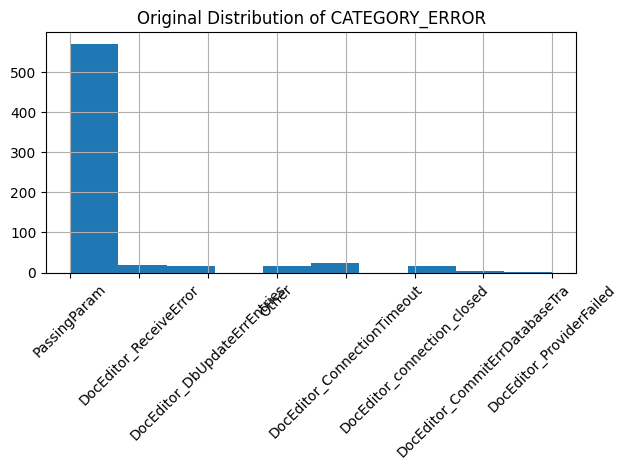

In [87]:
#View the distribution of CATEGORY_ERROR
# Plot histogram
data_analysis_cleaned['CATEGORY_ERROR'].hist()
plt.title('Original Distribution of CATEGORY_ERROR')

# Rotate and shorten x-axis labels to 10 characters
plt.xticks(
    ticks=plt.xticks()[0],  # Keep current tick positions
    labels=[str(label)[:30] for label in data_analysis_cleaned['CATEGORY_ERROR'].unique()],
    rotation=45
)

plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x2779bc4cef0>,
 [Text(0, 0, '118.0.0.0'),
  Text(1, 0, '116.0.0.0'),
  Text(2, 0, '109.0.0.0'),
  Text(3, 0, '119.0.0.0'),
  Text(4, 0, '111.0.0.0'),
  Text(5, 0, '115.0.0.0'),
  Text(6, 0, '120.0.0.0'),
  Text(7, 0, '121.0.0.0'),
  Text(8, 0, '114.0.0.0'),
  Text(9, 0, '132.0.0.0'),
  Text(10, 0, '134.0.0.0'),
  Text(11, 0, '131.0.0.0'),
  Text(12, 0, '135.0.0.0'),
  Text(13, 0, '604.1'),
  Text(14, 0, '605.1.15'),
  Text(15, 0, '133.0.0.0'),
  Text(16, 0, '126.0.0.0'),
  Text(17, 0, '122.0.0.0'),
  Text(18, 0, '123.0.0.0'),
  Text(19, 0, '129.0.0.0'),
  Text(20, 0, '130.0.0.0'),
  Text(21, 0, '136.0.0.0'),
  Text(22, 0, '127.0.0.0'),
  Text(23, 0, '124.0.0.0'),
  Text(24, 0, '125.0.0.0')])

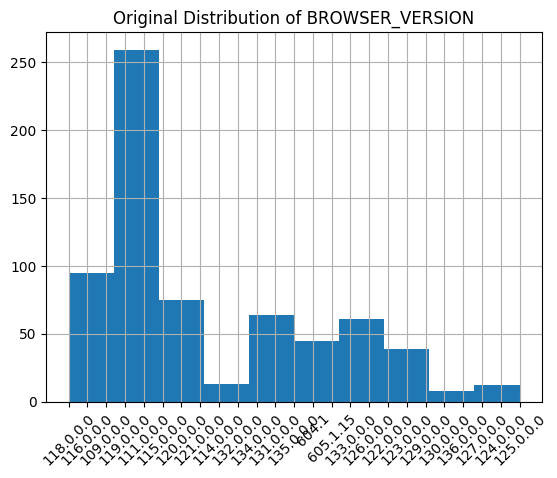

In [88]:
#View the distribution of BROWSER_VERSION
data_analysis_cleaned['BROWSER_VERSION'].hist()
plt.title('Original Distribution of BROWSER_VERSION')

# Rotate and shorten x-axis labels to 10 characters
plt.xticks(
    ticks=plt.xticks()[0],  # Keep current tick positions
    labels=[str(label)[:30] for label in data_analysis_cleaned['BROWSER_VERSION'].unique()],
    rotation=45
)

Text(0.5, 1.0, 'Original Distribution of BROWSER_NAME')

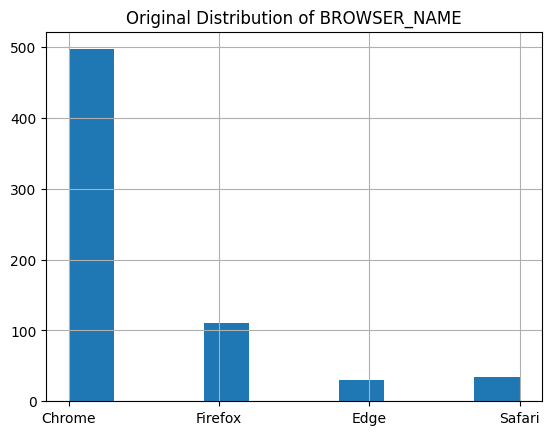

In [89]:
#View the distribution of BROWSER_NAME
data_analysis_cleaned['BROWSER_NAME'].hist()
plt.title('Original Distribution of BROWSER_NAME')

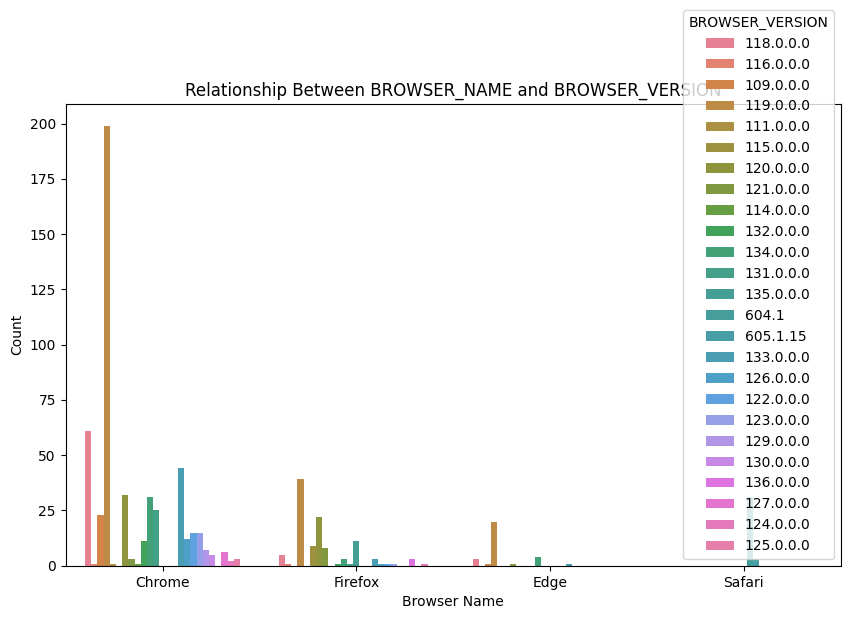

In [90]:
# Create a count plot
plt.figure(figsize=(10, 6))
#sns.countplot(data=data_analysis_cleaned, x='BROWSER_NAME', hue='BROWSER_VERSION')

ax = sns.countplot(data=data_analysis_cleaned, x='BROWSER_NAME', hue='BROWSER_VERSION')

# Add title and labels
plt.title('Relationship Between BROWSER_NAME and BROWSER_VERSION')
plt.xlabel('Browser Name')
plt.ylabel('Count')

plt.show()

In [91]:
#show the highest count of BROWSER_NAME and BROWSER_VERSION
# Step 1: Group by BROWSER_NAME and BROWSER_VERSION and count the occurrences
count_df = data_analysis_cleaned.groupby(['BROWSER_NAME', 'BROWSER_VERSION']).size().reset_index(name='Count')

# Step 2: Sort the count in descending order to show highest counts first
sorted_count_df = count_df.sort_values(by='Count', ascending=False)

# Step 3: Display the sorted list
print(sorted_count_df)

   BROWSER_NAME BROWSER_VERSION  Count
5        Chrome       119.0.0.0    199
4        Chrome       118.0.0.0     61
18       Chrome       133.0.0.0     44
29      Firefox       119.0.0.0     39
6        Chrome       120.0.0.0     32
42       Safari           604.1     31
19       Chrome       134.0.0.0     31
16       Chrome       131.0.0.0     25
0        Chrome       109.0.0.0     23
30      Firefox       120.0.0.0     22
22         Edge       119.0.0.0     20
9        Chrome       123.0.0.0     15
8        Chrome       122.0.0.0     15
12       Chrome       126.0.0.0     12
40      Firefox       135.0.0.0     11
17       Chrome       132.0.0.0     11
26      Firefox       115.0.0.0      9
31      Firefox       121.0.0.0      8
14       Chrome       129.0.0.0      7
13       Chrome       127.0.0.0      6
28      Firefox       118.0.0.0      5
15       Chrome       130.0.0.0      5
25         Edge       134.0.0.0      4
41      Firefox       136.0.0.0      3
7        Chrome       121

In [92]:
#show the highest count of BROWSER_NAME , BROWSER_VERSION, CREATED_DATE and YEAR

# Step 1: Extract the year from the 'DATE' column
data_analysis_cleaned['YEAR'] = data_analysis_cleaned['CREATED_DATE'].dt.year

# Step 2: Group by BROWSER_NAME, BROWSER_VERSION, and YEAR, and count the occurrences
count_df = data_analysis_cleaned.groupby(['BROWSER_NAME', 'BROWSER_VERSION', 'YEAR']).size().reset_index(name='Count')

# Step 3: Sort the count in descending order to show highest counts first
sorted_YEAR_df = count_df.sort_values(by='YEAR', ascending=False)

# Step 4: Display the sorted list
print(sorted_YEAR_df)

   BROWSER_NAME BROWSER_VERSION  YEAR  Count
2        Chrome       109.0.0.0  2025      2
18       Chrome       129.0.0.0  2025      1
21       Chrome       131.0.0.0  2025     10
24       Chrome       134.0.0.0  2025     31
23       Chrome       133.0.0.0  2025     44
22       Chrome       132.0.0.0  2025     11
44      Firefox       126.0.0.0  2025      1
52       Safari           604.1  2025      3
30         Edge       134.0.0.0  2025      4
33      Firefox       115.0.0.0  2025      2
29         Edge       133.0.0.0  2025      1
50      Firefox       136.0.0.0  2025      3
48      Firefox       134.0.0.0  2025      3
49      Firefox       135.0.0.0  2025     11
17       Chrome       129.0.0.0  2024      6
16       Chrome       127.0.0.0  2024      6
19       Chrome       130.0.0.0  2024      5
15       Chrome       126.0.0.0  2024     12
13       Chrome       124.0.0.0  2024      2
9        Chrome       120.0.0.0  2024      7
12       Chrome       123.0.0.0  2024     15
1        C

In [93]:
# Step 1: Extract the year from the 'DATE' column
data_analysis_cleaned['YEAR'] = data_analysis_cleaned['CREATED_DATE'].dt.year

# Step 2: Group by BROWSER_NAME, BROWSER_VERSION, and YEAR, and count the occurrences
count_df = data_analysis_cleaned.groupby(['BROWSER_NAME', 'BROWSER_VERSION', 'YEAR']).size().reset_index(name='Count')

# Step 3: For each BROWSER_NAME, find the row with the highest count
max_counts_df = count_df.loc[count_df.groupby('BROWSER_NAME')['Count'].idxmax()]

# Step 4: Display the result
print(max_counts_df)

   BROWSER_NAME BROWSER_VERSION  YEAR  Count
7        Chrome       119.0.0.0  2023    199
27         Edge       119.0.0.0  2023     20
37      Firefox       119.0.0.0  2023     39
51       Safari           604.1  2024     28


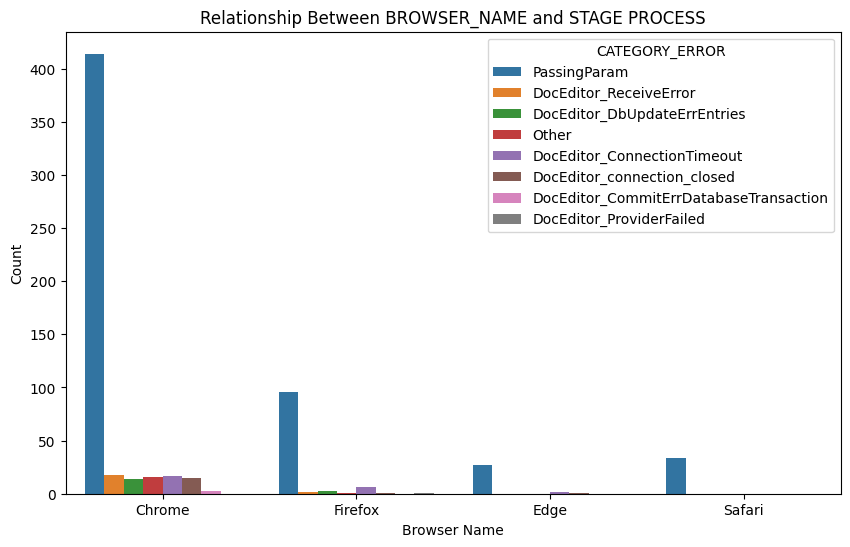

In [94]:
# Create a count plot
plt.figure(figsize=(10, 6))
#sns.countplot(data=data_analysis_cleaned, x='BROWSER_NAME', hue='BROWSER_VERSION')

ax = sns.countplot(data=data_analysis_cleaned, x='BROWSER_NAME', hue='CATEGORY_ERROR')

# Add title and labels
plt.title('Relationship Between BROWSER_NAME and STAGE PROCESS')
plt.xlabel('Browser Name')
plt.ylabel('Count')

plt.show()

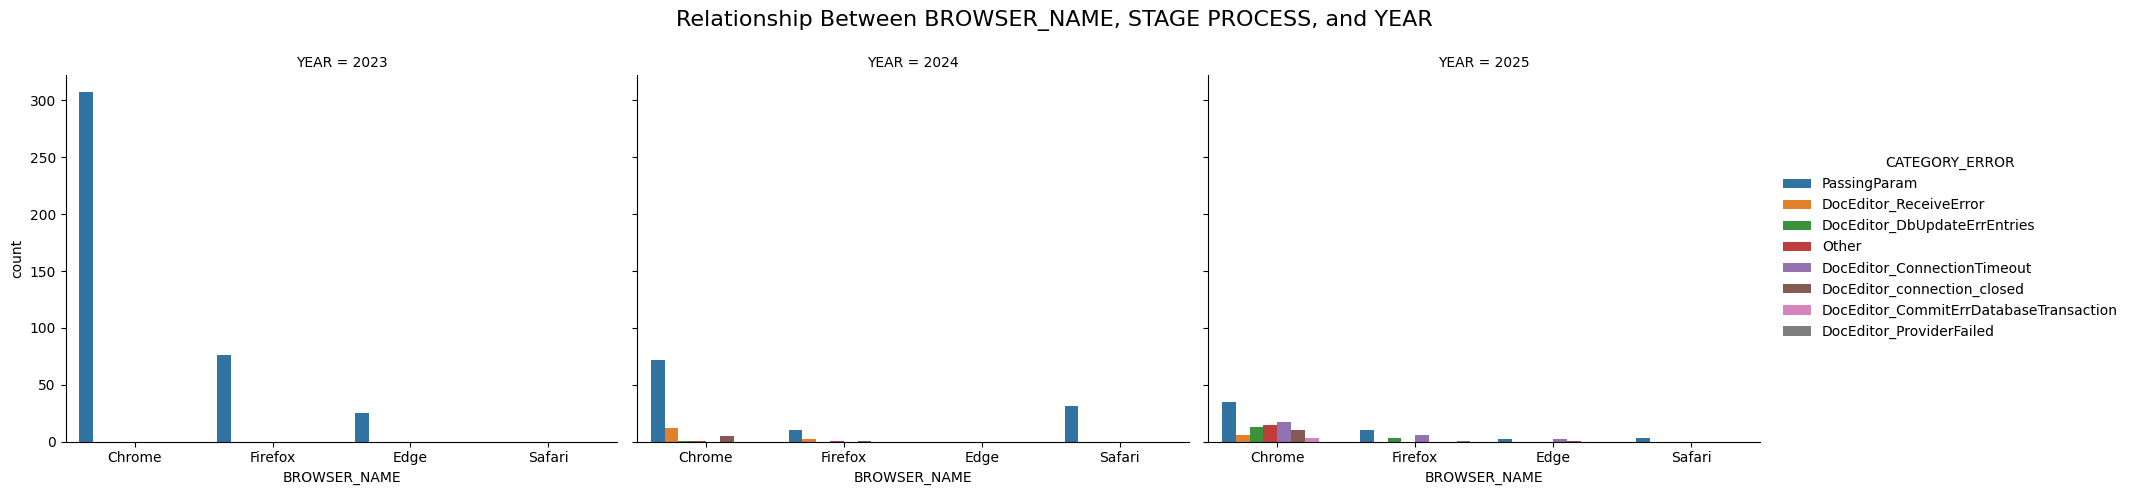

In [95]:
# Plot graph for BROWSER_NAME, STAGE PROCESS, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='BROWSER_NAME',
    hue='CATEGORY_ERROR',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between BROWSER_NAME, STAGE PROCESS, and YEAR', fontsize=16)
plt.show()

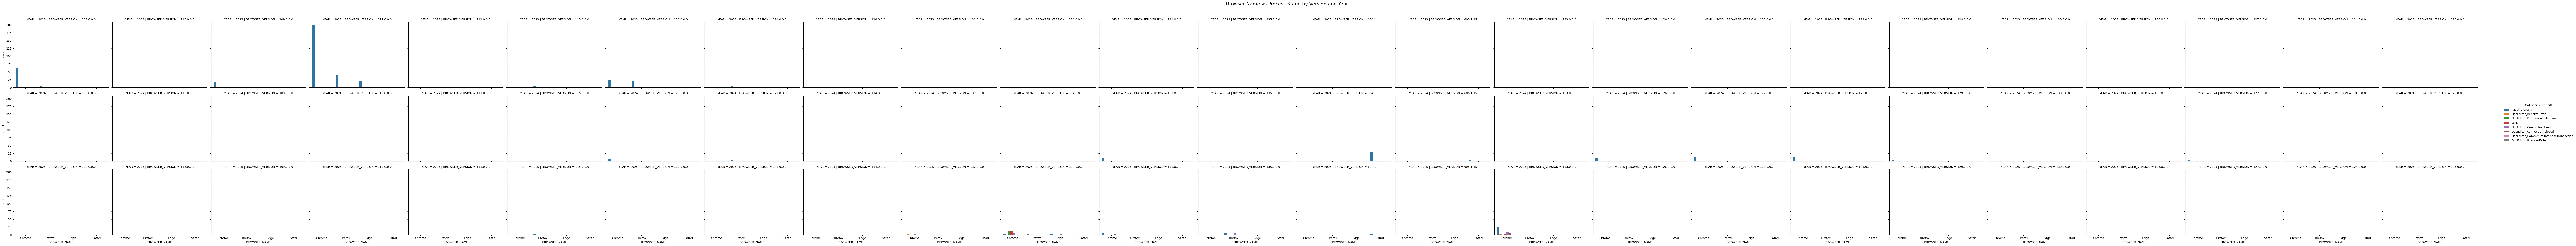

In [96]:
# Example: 4 features used with YEAR as the row feature
sns.catplot(
    data=data_analysis_cleaned,
    x='BROWSER_NAME',           # Feature 1: X-axis (Browser Name)
    hue='CATEGORY_ERROR',          # Feature 2: Color based on stage/process
    col='BROWSER_VERSION',      # Feature 3: Columns based on Browser Version
    row='YEAR',                 # Feature 4: Rows based on Year
    kind='count',
    height=4,
    aspect=1.2
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Browser Name vs Process Stage by Version and Year', fontsize=16)
plt.show()

In [97]:
data_analysis_cleaned.corr(numeric_only = True).abs()

,PAGE_NO,TOTAL_ANNOTATION,ISSUE_ISBLANKPNG,YEAR
PAGE_NO,1.000000,0.066467,NaN,0.103873
TOTAL_ANNOTATION,0.066467,1.000000,NaN,0.323240
ISSUE_ISBLANKPNG,NaN,NaN,NaN,NaN
YEAR,0.103873,0.323240,NaN,1.000000


In [98]:
data_analysis_cleaned['ISSUE_ISBLANKPNG'].value_counts(dropna = False)

ISSUE_ISBLANKPNG
1    671
Name: count, dtype: int64

In [99]:
#Drop the feature not using anymore 
data_analysis_cleaned = data_analysis_cleaned.drop('ISSUE_ISBLANKPNG', axis = 1)
data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PAGE_NO           671 non-null    int64         
 1   TOTAL_ANNOTATION  671 non-null    int64         
 2   DEVICE_NAME       671 non-null    string        
 3   CREATED_DATE      671 non-null    datetime64[ns]
 4   PROCESS_STAGE     671 non-null    string        
 5   BROWSER_VERSION   671 non-null    object        
 6   BROWSER_NAME      671 non-null    object        
 7   CATEGORY_ERROR    671 non-null    object        
 8   YEAR              671 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3), string(2)
memory usage: 44.7+ KB


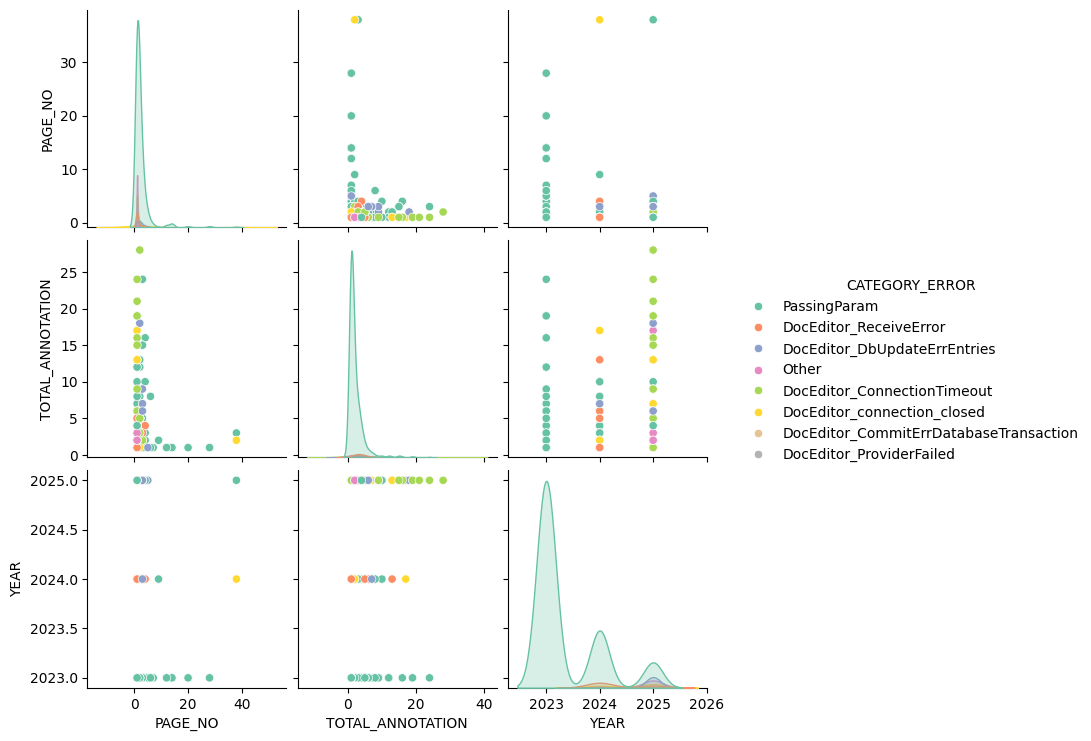

In [100]:
#Pair plot
sns.pairplot(data_analysis_cleaned, diag_kind='kde', hue='CATEGORY_ERROR', palette='Set2')
plt.show()

In [101]:
data_analysis_cleaned.corr(numeric_only = True).abs()



,PAGE_NO,TOTAL_ANNOTATION,YEAR
PAGE_NO,1.000000,0.066467,0.103873
TOTAL_ANNOTATION,0.066467,1.000000,0.323240
YEAR,0.103873,0.323240,1.000000


In [102]:
#Generate summary statistics for all of the data
data_analysis_cleaned.describe(include = 'all')

,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,YEAR
count,671.000000,671.000000,671,671,671,671,671,671,671.000000
unique,NaN,NaN,2,NaN,10,25,4,8,NaN
top,NaN,NaN,Desktop,NaN,Passing Parameter,119.0.0.0,Chrome,PassingParam,NaN
freq,NaN,NaN,617,NaN,466,258,497,571,NaN
mean,2.144560,2.533532,NaN,2024-04-08 03:41:37.198211584,NaN,NaN,NaN,NaN,2023.581222
min,1.000000,1.000000,NaN,2023-10-29 09:47:00,NaN,NaN,NaN,NaN,2023.000000
25%,1.000000,1.000000,NaN,2023-11-15 16:35:30,NaN,NaN,NaN,NaN,2023.000000
50%,1.000000,1.000000,NaN,2023-12-07 16:06:00,NaN,NaN,NaN,NaN,2023.000000
75%,2.000000,3.000000,NaN,2024-11-21 01:15:30,NaN,NaN,NaN,NaN,2024.000000
max,38.000000,28.000000,NaN,2025-03-26 15:05:00,NaN,NaN,NaN,NaN,2025.000000


In [103]:
#Generate summary statistics for numerical data only
data_analysis_cleaned.describe(include = np.number)

,PAGE_NO,TOTAL_ANNOTATION,YEAR
count,671.000000,671.000000,671.000000
mean,2.144560,2.533532,2023.581222
std,3.211216,3.193976,0.789222
min,1.000000,1.000000,2023.000000
25%,1.000000,1.000000,2023.000000
50%,1.000000,1.000000,2023.000000
75%,2.000000,3.000000,2024.000000
max,38.000000,28.000000,2025.000000


In [104]:
corr_matrix = data_analysis_cleaned.corr(numeric_only = True).abs()

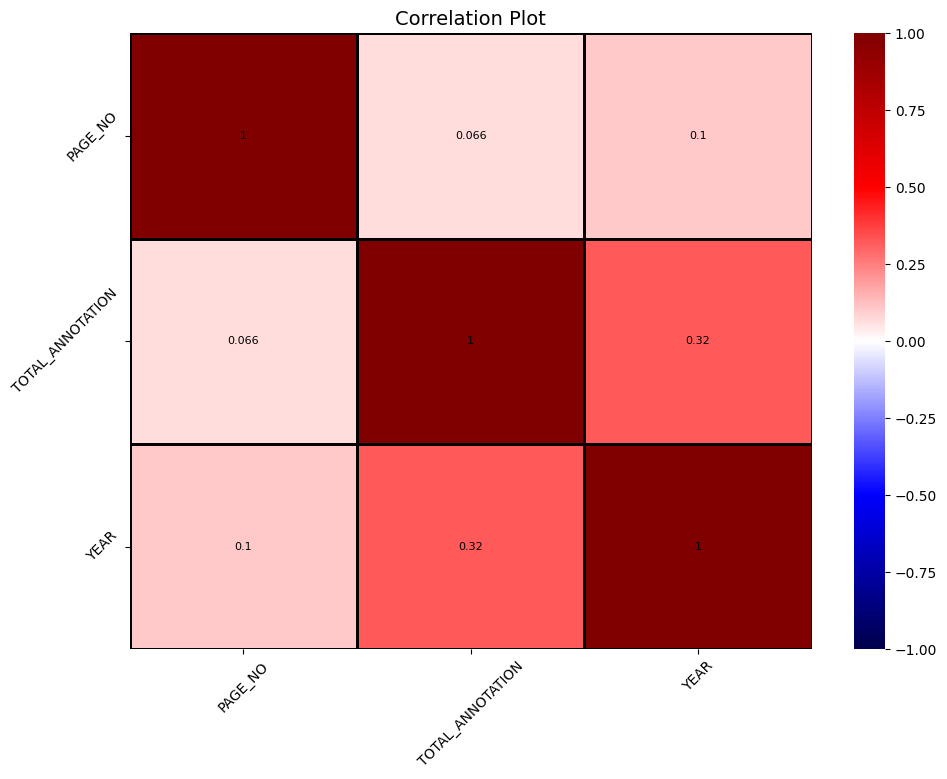

In [105]:
#Format the heatmap to make it easier to read
fig = plt.figure(figsize = (11, 8))

sns.heatmap(corr_matrix, 
            cmap = 'seismic', 
            linewidth = 0.75,
            linecolor = 'black',
            cbar = True,
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {'size': 8, 'color': 'black'})

plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot', size = 14);

In [106]:
#create bin hour from CREATED_DATE
def get_time_bin(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'night'

data_analysis_cleaned['TIME_BIN'] = data_analysis_cleaned['CREATED_DATE'].dt.hour.apply(get_time_bin)


data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PAGE_NO           671 non-null    int64         
 1   TOTAL_ANNOTATION  671 non-null    int64         
 2   DEVICE_NAME       671 non-null    string        
 3   CREATED_DATE      671 non-null    datetime64[ns]
 4   PROCESS_STAGE     671 non-null    string        
 5   BROWSER_VERSION   671 non-null    object        
 6   BROWSER_NAME      671 non-null    object        
 7   CATEGORY_ERROR    671 non-null    object        
 8   YEAR              671 non-null    int32         
 9   TIME_BIN          671 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(4), string(2)
memory usage: 49.9+ KB


Text(0.5, 1.0, 'Original Distribution of TIME_BIN from CREATED_DATE')

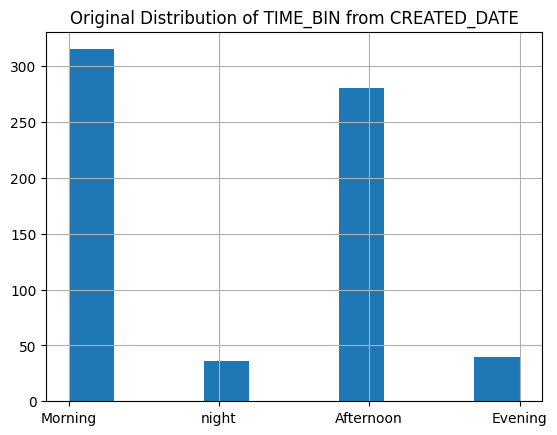

In [107]:
#View the distribution of TIME_BIN 
data_analysis_cleaned['TIME_BIN'].hist()
plt.title('Original Distribution of TIME_BIN from CREATED_DATE')

In [108]:
#create bin weekday from CREATED_DATE
data_analysis_cleaned['IS_WEEKEND'] = data_analysis_cleaned['CREATED_DATE'].dt.weekday >= 5

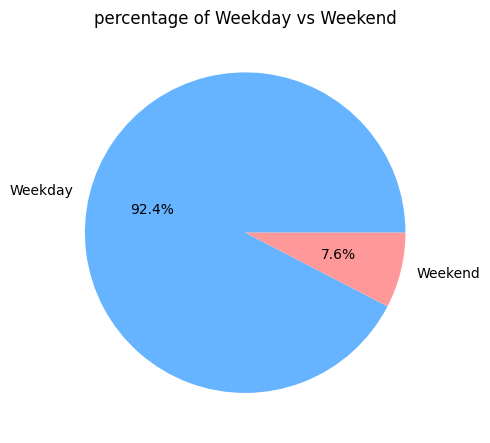

In [109]:
plt.figure(figsize=(5, 5))
data_analysis_cleaned['IS_WEEKEND'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Weekday', 'Weekend'], colors=['#66b3ff','#ff9999'])
plt.title("percentage of Weekday vs Weekend")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [110]:
#create bin week from CREATED_DATE
#create bin quater from CREATED_DATE
data_analysis_cleaned['WEEK'] = data_analysis_cleaned['CREATED_DATE'].dt.isocalendar().week
data_analysis_cleaned['QUARTER'] = data_analysis_cleaned['CREATED_DATE'].dt.quarter

In [111]:
data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PAGE_NO           671 non-null    int64         
 1   TOTAL_ANNOTATION  671 non-null    int64         
 2   DEVICE_NAME       671 non-null    string        
 3   CREATED_DATE      671 non-null    datetime64[ns]
 4   PROCESS_STAGE     671 non-null    string        
 5   BROWSER_VERSION   671 non-null    object        
 6   BROWSER_NAME      671 non-null    object        
 7   CATEGORY_ERROR    671 non-null    object        
 8   YEAR              671 non-null    int32         
 9   TIME_BIN          671 non-null    object        
 10  IS_WEEKEND        671 non-null    bool          
 11  WEEK              671 non-null    UInt32        
 12  QUARTER           671 non-null    int32         
dtypes: UInt32(1), bool(1), datetime64[ns](1), int32(2), int64(2), object(4), string(

In [112]:
#remove the feature that not very important
cols_to_drop = ['WEEK', 'QUARTER']
data_analysis_cleaned = data_analysis_cleaned.drop(cols_to_drop, axis = 1)
data_analysis_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PAGE_NO           671 non-null    int64         
 1   TOTAL_ANNOTATION  671 non-null    int64         
 2   DEVICE_NAME       671 non-null    string        
 3   CREATED_DATE      671 non-null    datetime64[ns]
 4   PROCESS_STAGE     671 non-null    string        
 5   BROWSER_VERSION   671 non-null    object        
 6   BROWSER_NAME      671 non-null    object        
 7   CATEGORY_ERROR    671 non-null    object        
 8   YEAR              671 non-null    int32         
 9   TIME_BIN          671 non-null    object        
 10  IS_WEEKEND        671 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(4), string(2)
memory usage: 50.6+ KB


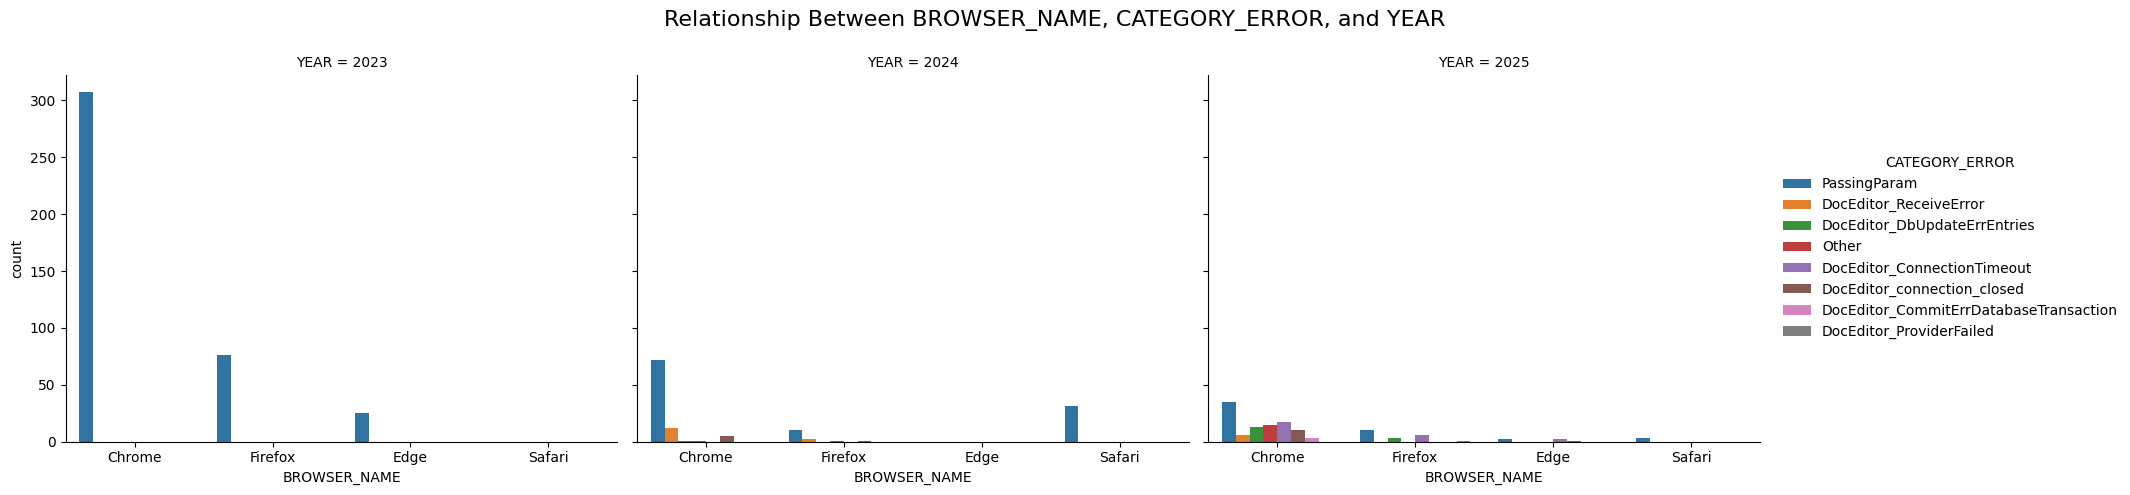

In [113]:
# Plot graph for BROWSER_NAME, STAGE PROCESS, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='BROWSER_NAME',
    hue='CATEGORY_ERROR',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between BROWSER_NAME, CATEGORY_ERROR, and YEAR', fontsize=16)
plt.show()

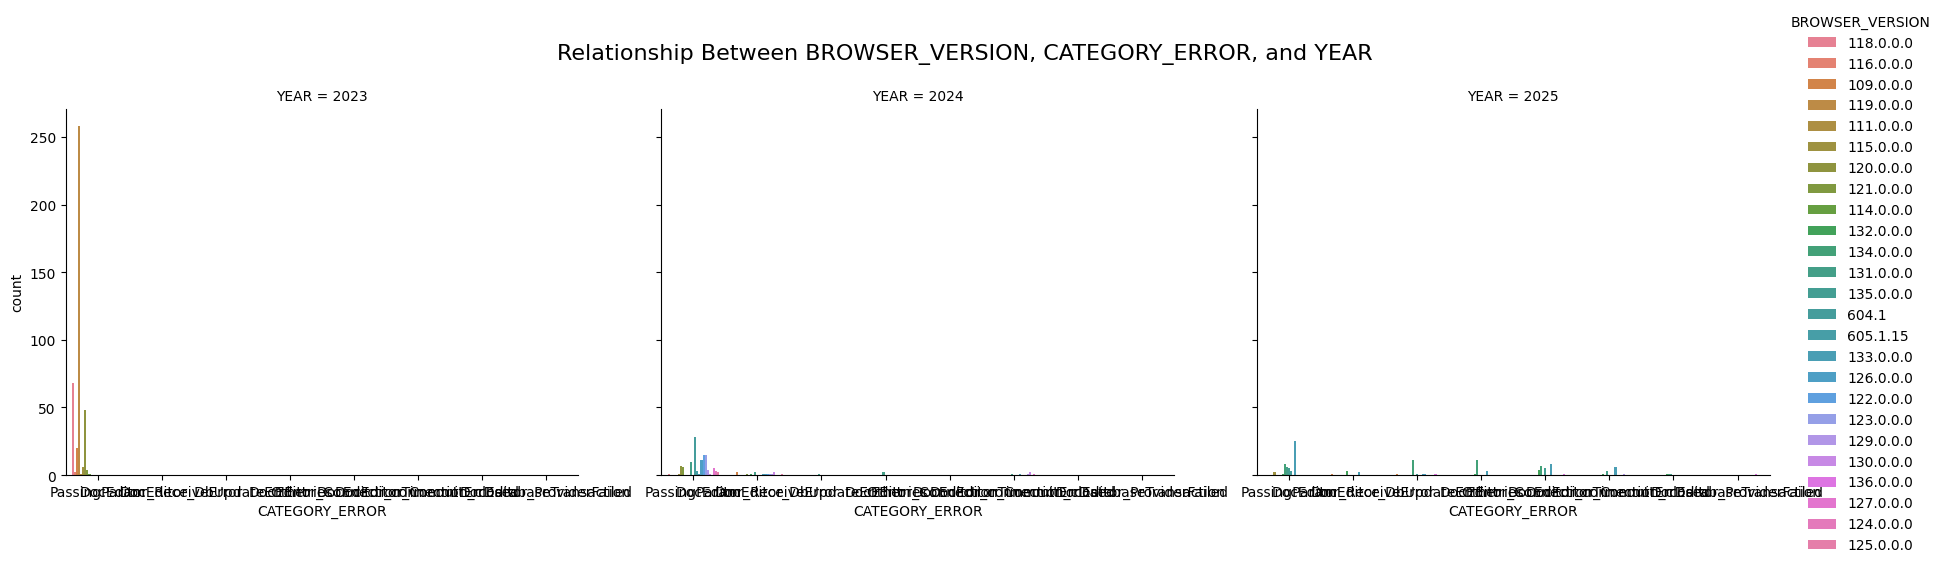

In [114]:
# Plot graph for BROWSER_VERSION, CATEGORY_ERROR, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='CATEGORY_ERROR',
    hue='BROWSER_VERSION',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between BROWSER_VERSION, CATEGORY_ERROR, and YEAR', fontsize=16)
plt.show()

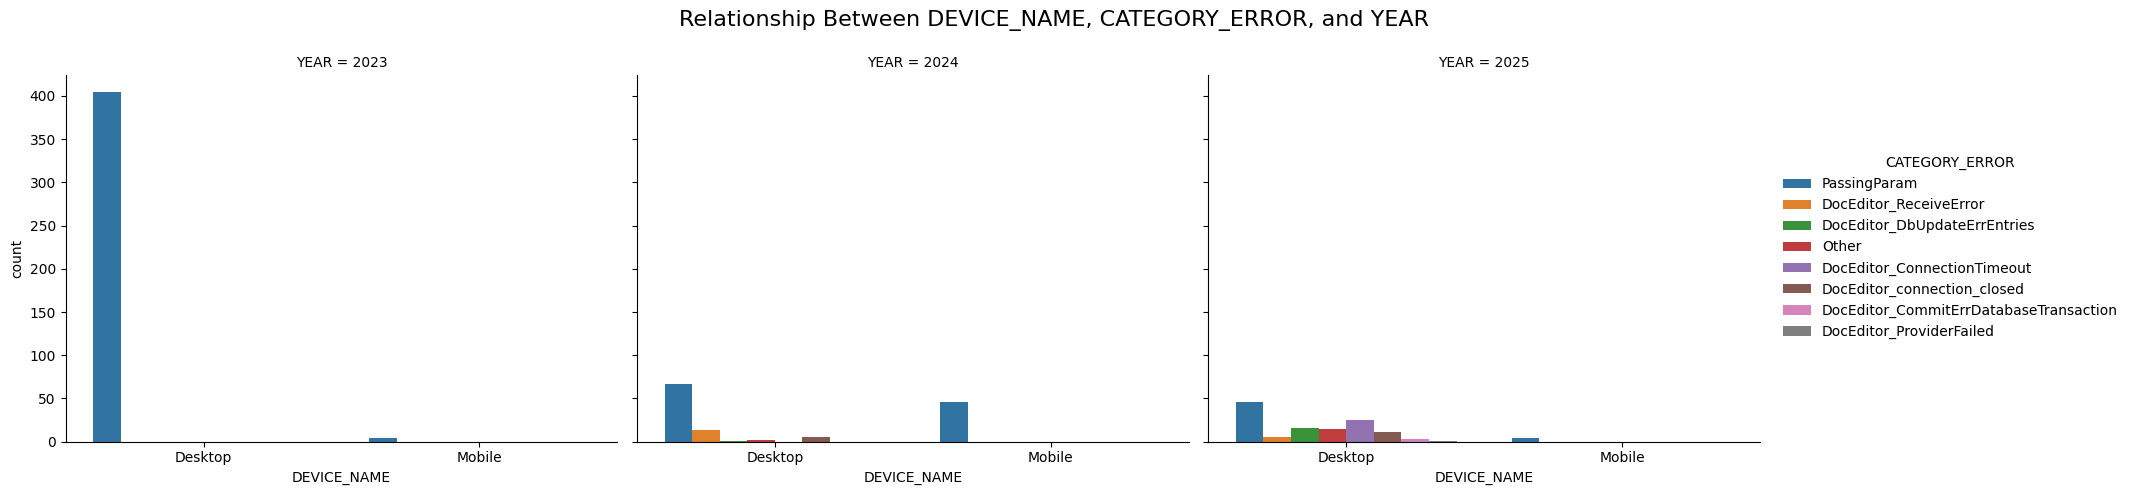

In [115]:
# Plot graph for DEVICE_NAME, CATEGORY_ERROR, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='DEVICE_NAME',
    hue='CATEGORY_ERROR',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between DEVICE_NAME, CATEGORY_ERROR, and YEAR', fontsize=16)
plt.show()

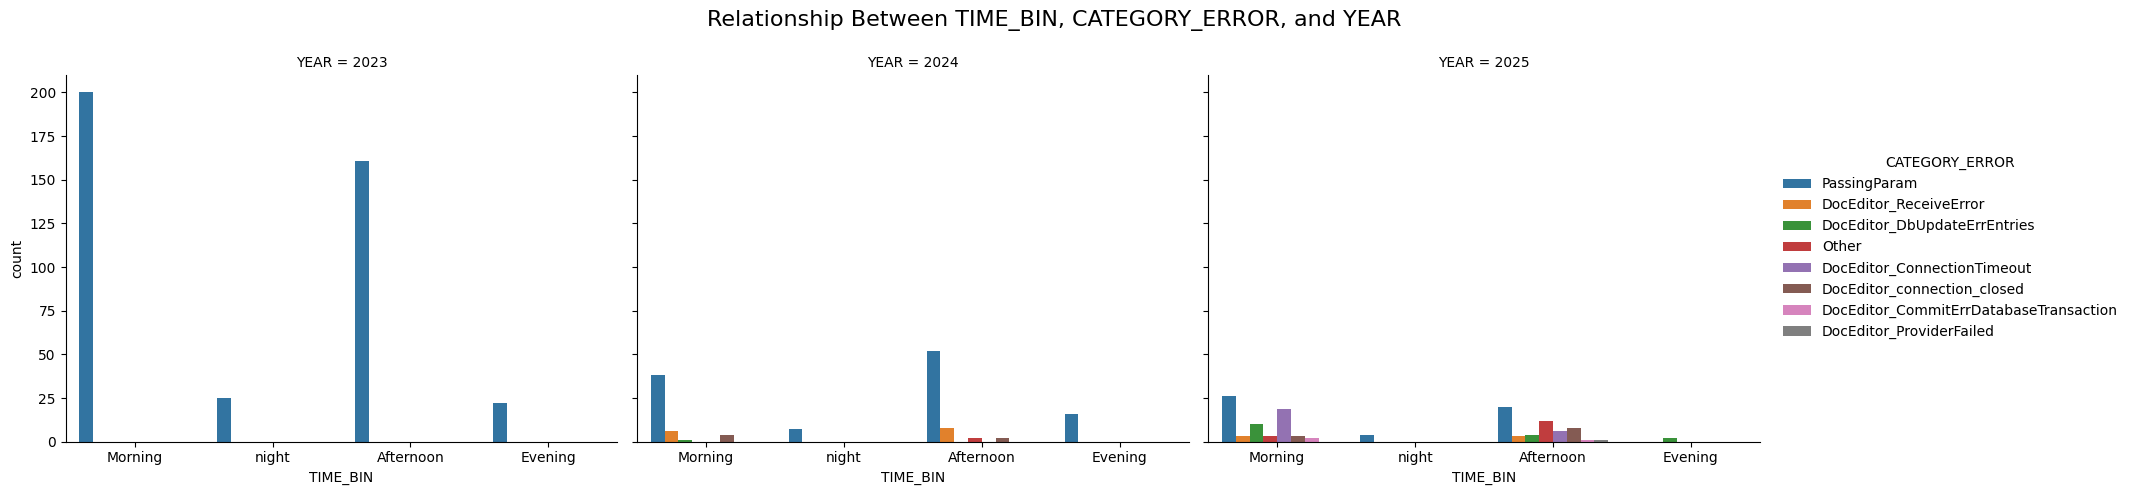

In [116]:
# Plot graph for TIME_BIN, CATEGORY_ERROR, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='TIME_BIN',
    hue='CATEGORY_ERROR',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between TIME_BIN, CATEGORY_ERROR, and YEAR', fontsize=16)
plt.show()

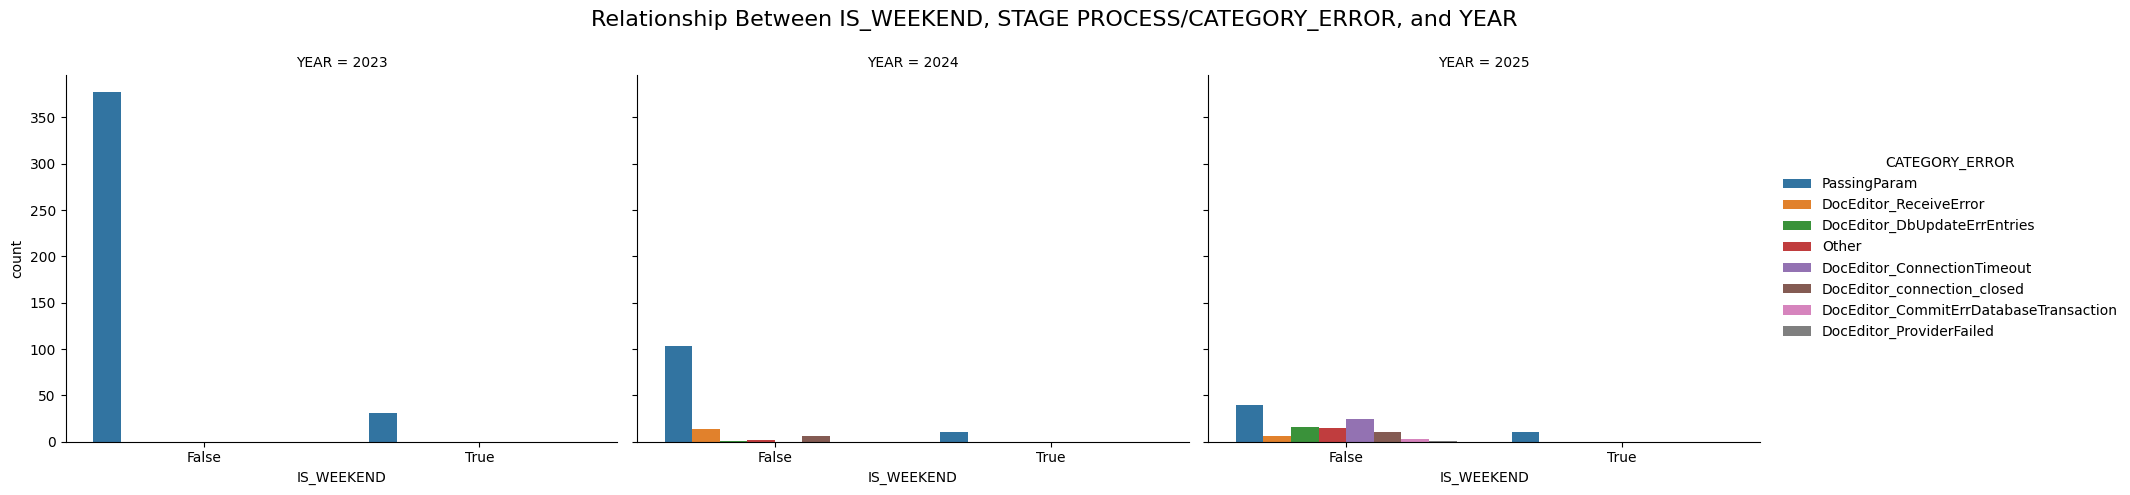

In [119]:
# Plot graph for IS_WEEKEND, STAGE PROCESS, and YEAR
sns.catplot(
    data=data_analysis_cleaned,
    x='IS_WEEKEND',
    hue='CATEGORY_ERROR',
    col='YEAR',  # ← add Feature (3rd variable)
    kind='count',
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship Between IS_WEEKEND, STAGE PROCESS/CATEGORY_ERROR, and YEAR', fontsize=16)
plt.show()

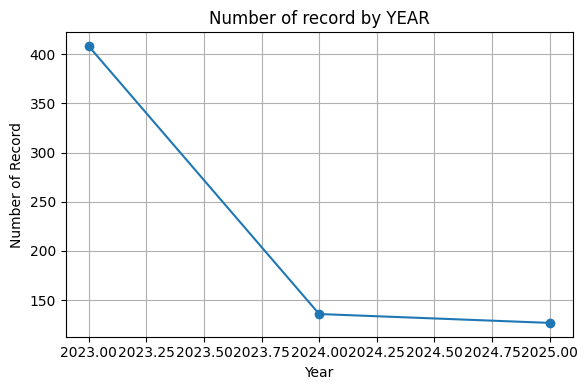

In [118]:
#Line plot: Number of record by YEAR
plt.figure(figsize=(6, 4))
data_analysis_cleaned['YEAR'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of record by YEAR")
plt.xlabel("Year")
plt.ylabel("Number of Record")
plt.grid(True)
plt.tight_layout()
plt.show()


# ANALYSIS SUMMARY

1)The corelation between features were not strong and hardly to relate each features based on data.

2)The data not very large, may hard to do the training process. But this data still can do Training process even with a small data about 600 to 700. This total Data can give easier to do analysis and understandad the data. But it may give a problem when it come to model process like overfitting, memorize the traininng and could not handle with new data and could do the complex model. but it can do with a simple model.

3)The shape of data is about 678 row and 15 features.

4)after cleaning process, the total data is 671 and 11 features.

5)the features are PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,short_label,YEAR,TIME_BIN and IS_WEEKEND.

6)the data type for Bool is IS_WEEKEND only. 

7)the data type for Date time format is CREATED_DATE.

8)the data type for Int is YEAR,PAGE_NO and TOTAL_ANNOTATION.

9)the other data type like object are BROWSER_VERSION,BROWSER_NAME and short_label.

10)the other data type like string DEVICE_NAME and PROCESS_STAGE.

11)Exploratory Data Analysis(EDA) used to process and analysis the data to undertand the data,pattern, tren and the structure of data.

12)the data recorded the user mostly add annotation like put text,line,image on page no 1 in document.

13)Total annotation mostly added by 1-5. 

14)Device used alot by user is PC and the least used is moble phone. the category for Desktop is about 617 and Mobile is 54.

15)Browser Chrome is the most used rather than firefox,safari and edge. The Chrome is 497, Firefox is 110, Safari is 34, and Edge is 30.

16)the features showing the issues happen in morning and afternoon on weekday compare to weekend. Total data on weekday is about 620 and weekend is about 51. if in percentage for weekday is 92.4% and weekend is 7.6%.

17)Browser Chrome with 119.0.0.0 the most happen issues lost data during process saving document after adding annotation by user.

18)Based on graph 'Relationship Between BROWSER_NAME, CATEGORY_ERROR, and YEAR' showing that the starting year 2023 have a critical issues happen.this issues happen caused by the proccess failed to passing the paramater by requesting to the server may have lost data.

19)The Error happen on 2023 only showing Parameter issues compare to data on 2024 and 2025. On these year start show various of error happen. Means on 2023, the Monitoring system still only focus on one error only that have been reported by User. After that Developer start to improvise the monitoring system to capture various of error in order to study the data and planning to create a solution. 

20)Based on graph 'Relationship Between DEVICE_NAME, CATEGORY_ERROR, and YEAR' showing that the used of PC has a lot issues during year 2023 meanwhile 20024 and 2025 already deccreasing issues happen and together with other error.Means after 2023, the issues of passing the paramater has been prevent by developer. But this is not the only fix by dev can be resolved the issues. The Updated version of browser also can help to decreasing the issues.

21)Based on graph 'Relationship Between TIME_BIN, CATEGORY_ERROR, and YEAR', the data show that user will do work at morning most happen at 2023 and following afternoon, compare to 2024 and 2025 showing the the issues has been decreasing.



